# Customer Segmentation using PCA and K-Means

- **Goal** - What problem to solve?  <br>
  - In the business context, understanding customers is crucial. This project focuses on **customer segmentation analysis using the KMeans unsupervised learning method**. The objective is to categorize customers into distinct groups based on various characteristics and behaviors, aiming to uncover unique needs and pain points within each segment. The ultimate goal is to provide **actionable recommendations** aligned with the specific preferences and characteristics identified in each customer segment
- **ML approach**?
  - For clustering, the unsupervised **KMeans** method will be employed. While other clustering methods could be considered, because lots of analysis happens post-modeling for this project, I will only focus on KMeans for simplicity. 
    
  - Since KMeans is vulnerable to curse of dimensionality, we will do lots of **feature selection/engineering** including **PCA**.  
    
    
- **Model tuning for unsupervised learning**?
  - Unsupervised learning don't have labels. In this project, tuning happens in the following areas:
    
    - **Scaling**: although technically not tuning, scaling is key for KMeans performance. With the help of PCA visualization, a comparison of MinMax and Standard scaling will be conducted.
    
    - **PCA Dimensions**: will be determined using variance analysis, principal component coefficients analysis, and consideration of business interests. 
    - **Number of Clusters**: will be determined using elbow method with a practical analysis based on resutling clustering groups.

## 1: Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
# Basic data inspections
pd.set_option('display.max_columns', None)
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Take a look at some statistics. Since there are many columns, I break down the output by 2 parts.

In [5]:
data.loc[:,'Education':'MntGoldProds'].describe(include='all').style.background_gradient(cmap='Greys')

In [6]:
data.loc[:,'NumDealsPurchases':].describe(include='all').style.background_gradient(cmap='Greys')

In [7]:
print('duplicates: ',data.duplicated().sum())
print('NAs: \n', data.isna().sum())

duplicates:  0
NAs: 
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


- Dataset has 2240 rows and 29 columns.

- As described, dataset has attributes in 4 areas: people, products, promotions, and places.

- Columns like 'Z_CostContact' and 'Z_Revenue' have same values and provide no useful information. They can be safely deleted.

- 'Income' has 24 null values.

- 'Dt_Customer' is in object format and needs to be converted. 

### 1.1 Data Preprocessing

- Part 1.3.1: Basic data cleaning  <br>
    (Additional cleaning and feature creation happen during data preprocessing for modeling purposes.)
    
  - Remove **irrelevant columns**  
    
  - Inspect and clean **missing values** 
     
- Part 1.3.2: **Datetime and new features** <br>
    
  - Datetime features usually need some transformation so we can extract some useful information from them. We'll look at field such as **'Dt_Customer'**.<br>
    <br>
    
- Part 1.3.3: Seperate **discrete and continuous** features 
    
  - Numerical feature without many unique values are discrete features. It's easier to visualize and analyze them as categorical features.

#### Drop NAs

In [8]:
# Drop columns "Z_CostContact" and "Z_Revenue".
data.drop(["Z_CostContact" , "Z_Revenue"] ,axis=1, inplace=True)
# Drop "ID" also, they aren't useful. 
data.drop(["ID"] ,axis=1, inplace=True)

In [9]:
# We've known there are 24 records with null values.Take a look.
data[data['Income'].isnull()].sample(5)

Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
2078        1971  Graduation        Married     NaN        1         1   
71          1973    2n Cycle        Married     NaN        1         0   
91          1957  Graduation         Single     NaN        1         1   
1383        1964    2n Cycle         Single     NaN        1         1   
2084        1943      Master          Widow     NaN        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2078  03-03-2013       82        71          1               16   
71    14-09-2012       25        25          3               43   
91    27-05-2014       45         7          0                8   
1383  12-01-2014       49         5          1                9   
2084  30-10-2013       75       532        126              490   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2078                0                 0             9                  4   
71                 17                 4            17                  3   
91                  2                 0             1                  1   
1383                2                 0             4                  1   
2084              164               126           126                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2078                2                    1                  3   
71                  3                    0                  3   
91                  1                    0                  2   
1383                1                    0                  2   
2084                5                    5                 11   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2078                  8             0             0             0   
71                    8             0             0             0   
91                    7             0             0             0   
1383                  7             0             0             0   
2084                  1             0             0             1   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
2078             0             0         0         0  
71               0             0         0         0  
91               0             0         0         0  
1383             0             0         0         0  
2084             0             0         0         1

In [10]:
# Seems there are nothing special about them. Exclude them.
data.dropna(subset=['Income'],axis=0, inplace=True)
data.shape

(2216, 26)

#### 'DT_Customer' feature

In [11]:
# Convert 'Dt_customer' to datetime type
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format="%d-%m-%Y")
print('Dt_Customer type: ',data["Dt_Customer"].dtype)

Dt_Customer type:  datetime64[ns]


In [12]:
# To create seniority, we need to find a reasonable point of time for calculation so we dive in  the 'Dt_Customer' field a bit
# Check the earliest and latest date time
print('Earliest customer enrollment date: ', data['Dt_Customer'].min())
print('latiest customer enrollment date: ', data['Dt_Customer'].max())

Earliest customer enrollment date:  2012-07-30 00:00:00
latiest customer enrollment date:  2014-06-29 00:00:00


#### Create 'Seniority' feature
Okay, Dt_Custeomer' ranges from around mid of 2012 to 2014. 
I think using latest customer enrollment date as the date point for calculation is reasonable. I would like to use it in weeks.

In [13]:
# Create 'Seniority'(in weeks) feature. 
last_date =  data['Dt_Customer'].max()
data['Seniority'] = (last_date -data['Dt_Customer']).dt.days/7

# Take a look to make sure calculation is correct
data[['Dt_Customer','Seniority' ]].head(2)

Dt_Customer  Seniority
0  2012-09-04  94.714286
1  2014-03-08  16.142857

In [14]:
# 'Dt_Customer' is now redundant. Remove
data.drop(['Dt_Customer'], axis=1, inplace=True)

In [15]:
# Create 'Age' feature.
# I am not sure when the data is collected but it could be in 2021. Let's just use 2021 as 'today' to calculate the age.
today = 2021
data['Age'] = today - data['Year_Birth']

# 'Year_Birth' is now redundant. Remove
data.drop(['Year_Birth'], axis=1, inplace=True)

In [16]:
# Divide features by discrete and continuous

# Function to seperate discrete and continuous features in original data (won't work after PCA or Clustering)
def divide_feature_types(data):
        '''
        inpute a data frame and output continuous, and discrete feature columns in list format
        '''
        # Initialize
        col_cont=[] 
        col_dis=[] 
        # loop through and seperate columns
        for c in data.columns: 
            if ('home' in c) or ('Num' in c) or ('Accepted' in c) or (c=='Complain') or (c=='Response'): 
                col_dis.append(c)
            elif (data[c].dtype=='O'):
                col_dis.append(c)
            else:
                col_cont.append(c)
        return col_cont, col_dis

# Call the function and get column lists
col_cont, col_dis = divide_feature_types(data)
print('Continuous numerical features: ', col_cont)
print('Categorical or discrete features: ', col_dis)

Continuous numerical features:  ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Seniority', 'Age']
Categorical or discrete features:  ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


### 1.2 Visualization

#### Histogram and kdeplot to check overall distribution first.

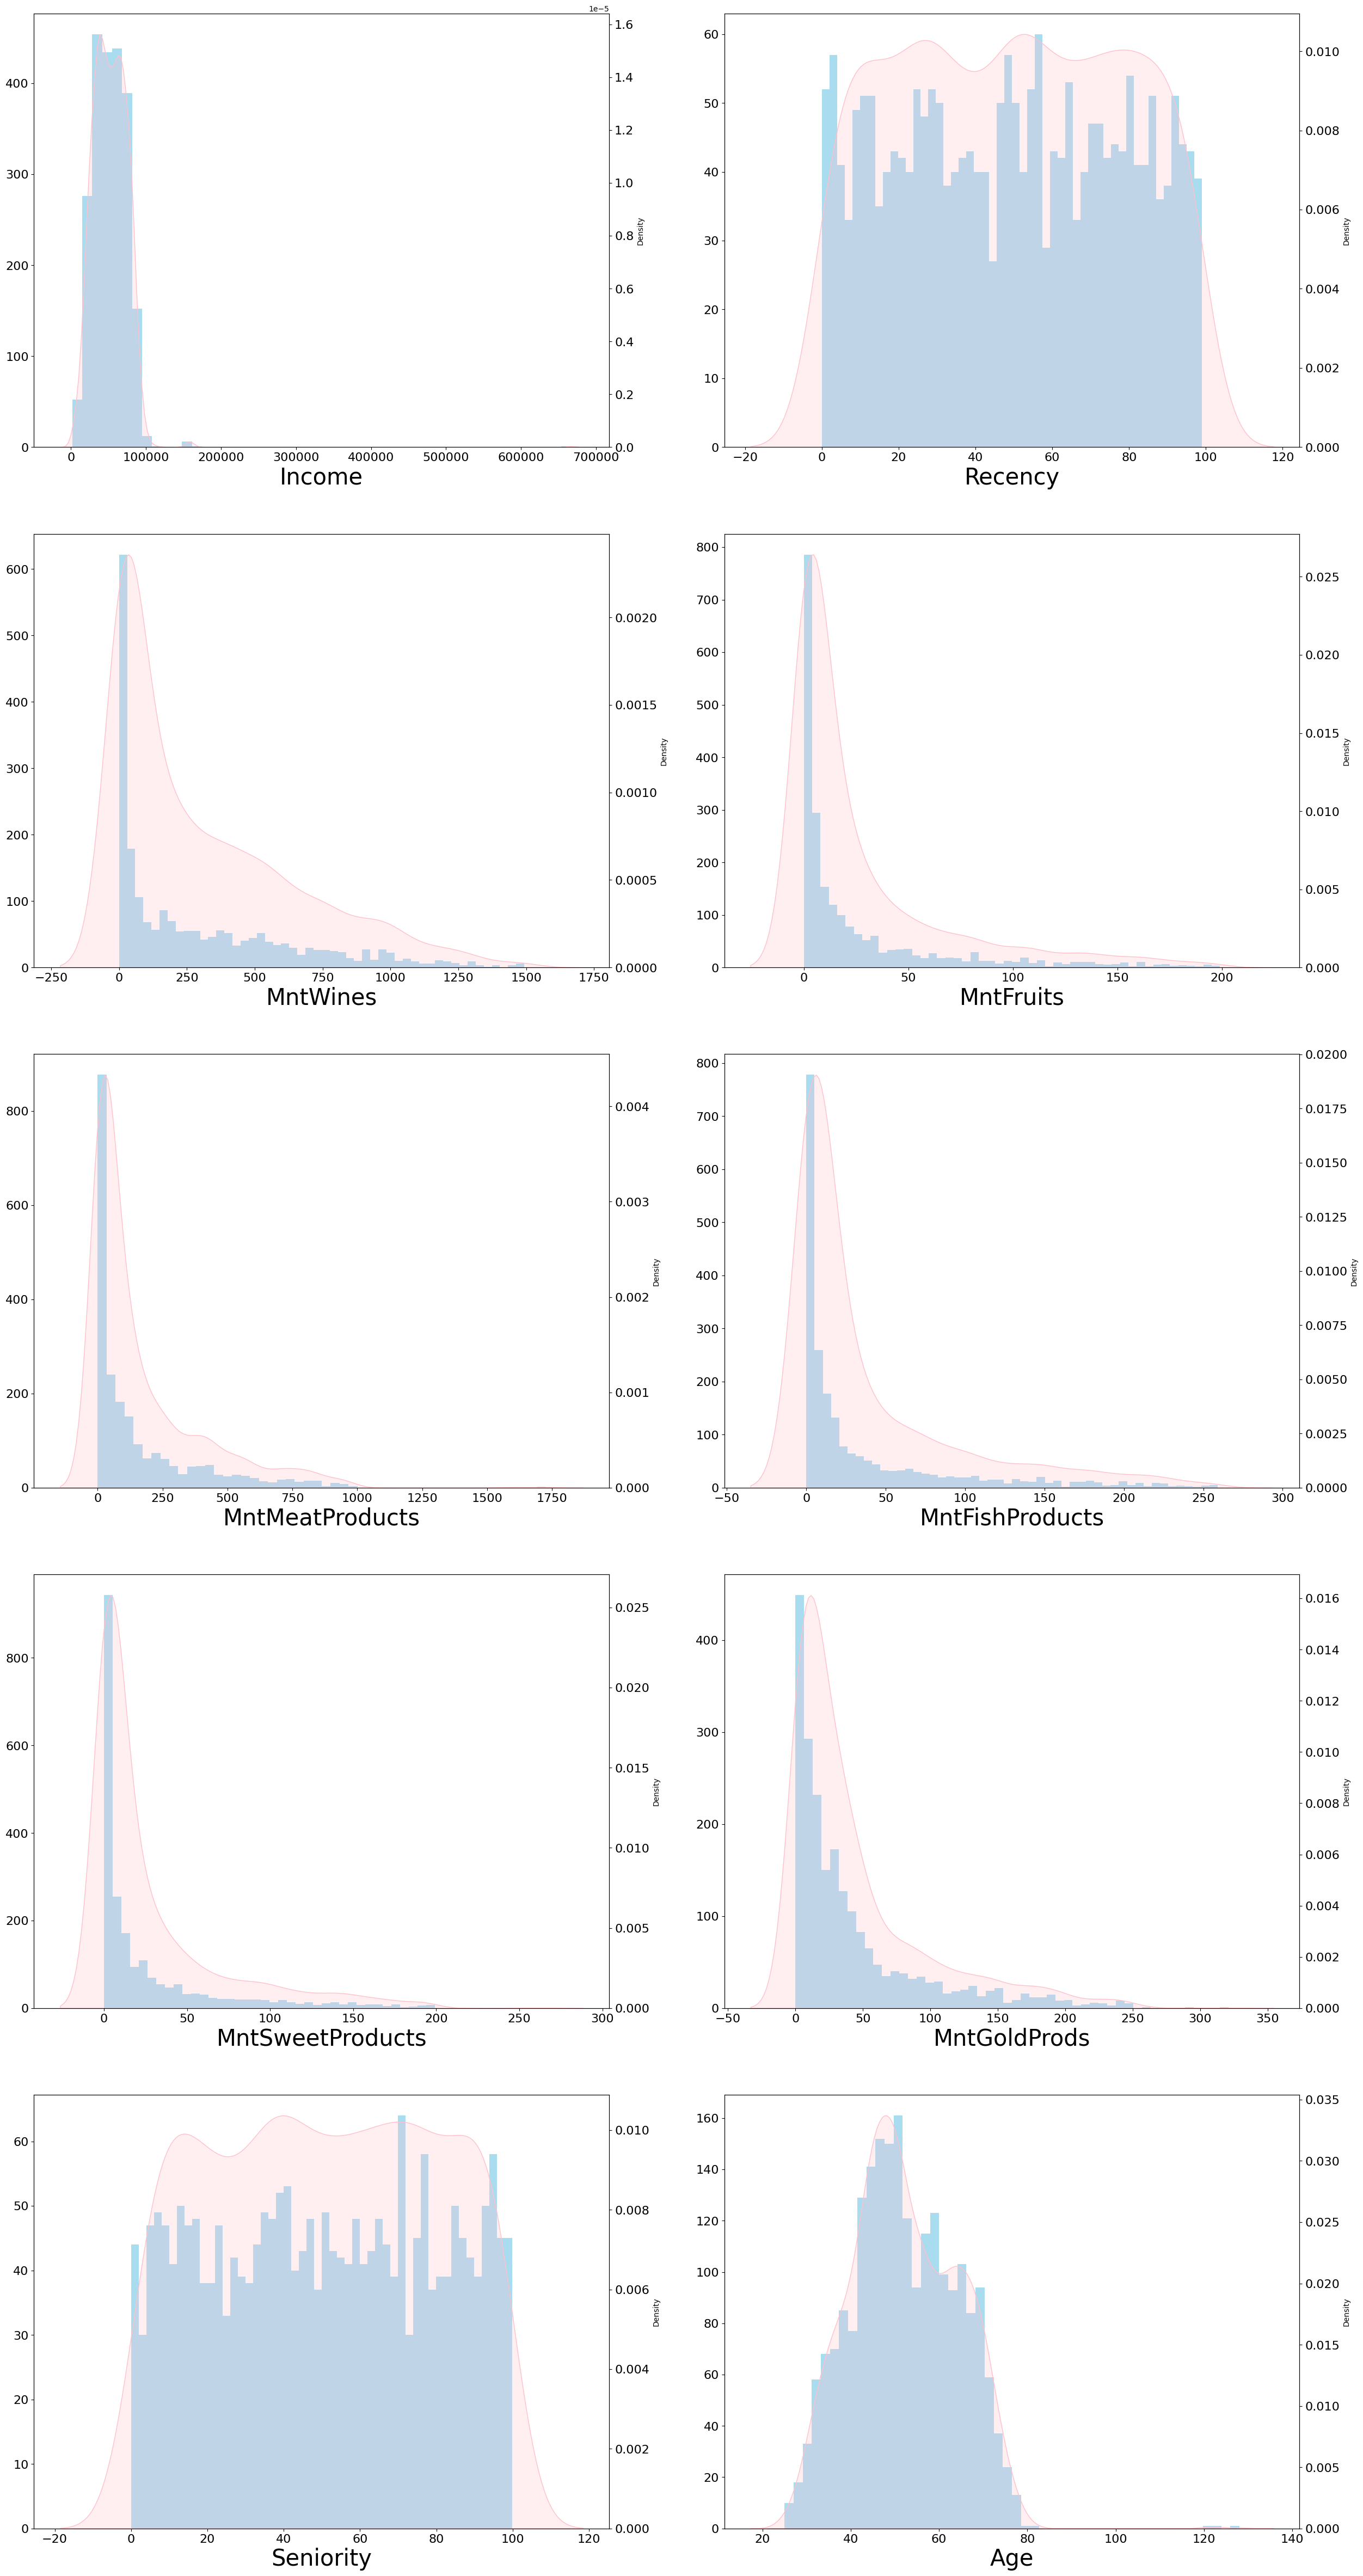

In [17]:
# Histogram and kdeplot for all continuous features 
grh_per_row = 2
fig, ax = plt.subplots(len(col_cont) // grh_per_row , grh_per_row, figsize=(30, 60))

for count, feature in enumerate(col_cont, 0):
    data_copy = data.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row

    # Plot histogram on the primary y-axis
    ax[row, col].hist(data_copy[feature], bins=50, alpha=0.7, color='skyblue', label='Histogram')
    ax[row, col].set_xlabel(feature, fontsize=30)
#     ax[row, col].set_ylabel("Histogram Count", color='blue', fontsize=30)
#     ax[row, col].legend(loc='upper left', fontsize=30)
    
    # Plot KDE plot on the secondary y-axis
    ax2 = ax[row, col].twinx()
    sns.kdeplot(data_copy[feature], fill=True, color='pink', ax=ax2, label='KDE Plot')
#     ax2.set_ylabel("KDE Density", color='red', fontsize=30)
#     ax2.legend(loc='upper right', fontsize=30)
    ax[row, col].tick_params(axis='both', labelsize=16)
    ax2.tick_params(axis='both', labelsize=16)

plt.show()


- Seems income and age follow sort of some normal distributions. That's good. Overall, customers seem to be mostly mid age to senior. Seniority and recency seems to be quite uniform with some high and lows but nothing too strange. For amounts purchased (fields start with 'Mnt'), the distribution lean and concentrate at the very low (near 0) end. This could be something we need to dig. 
- Next, I want to see  how the distribution of continuous features vary by some discrete features. Let's take a look at some boxplot by education, marital status, kidhome, teenhome.

#### Continuous Features

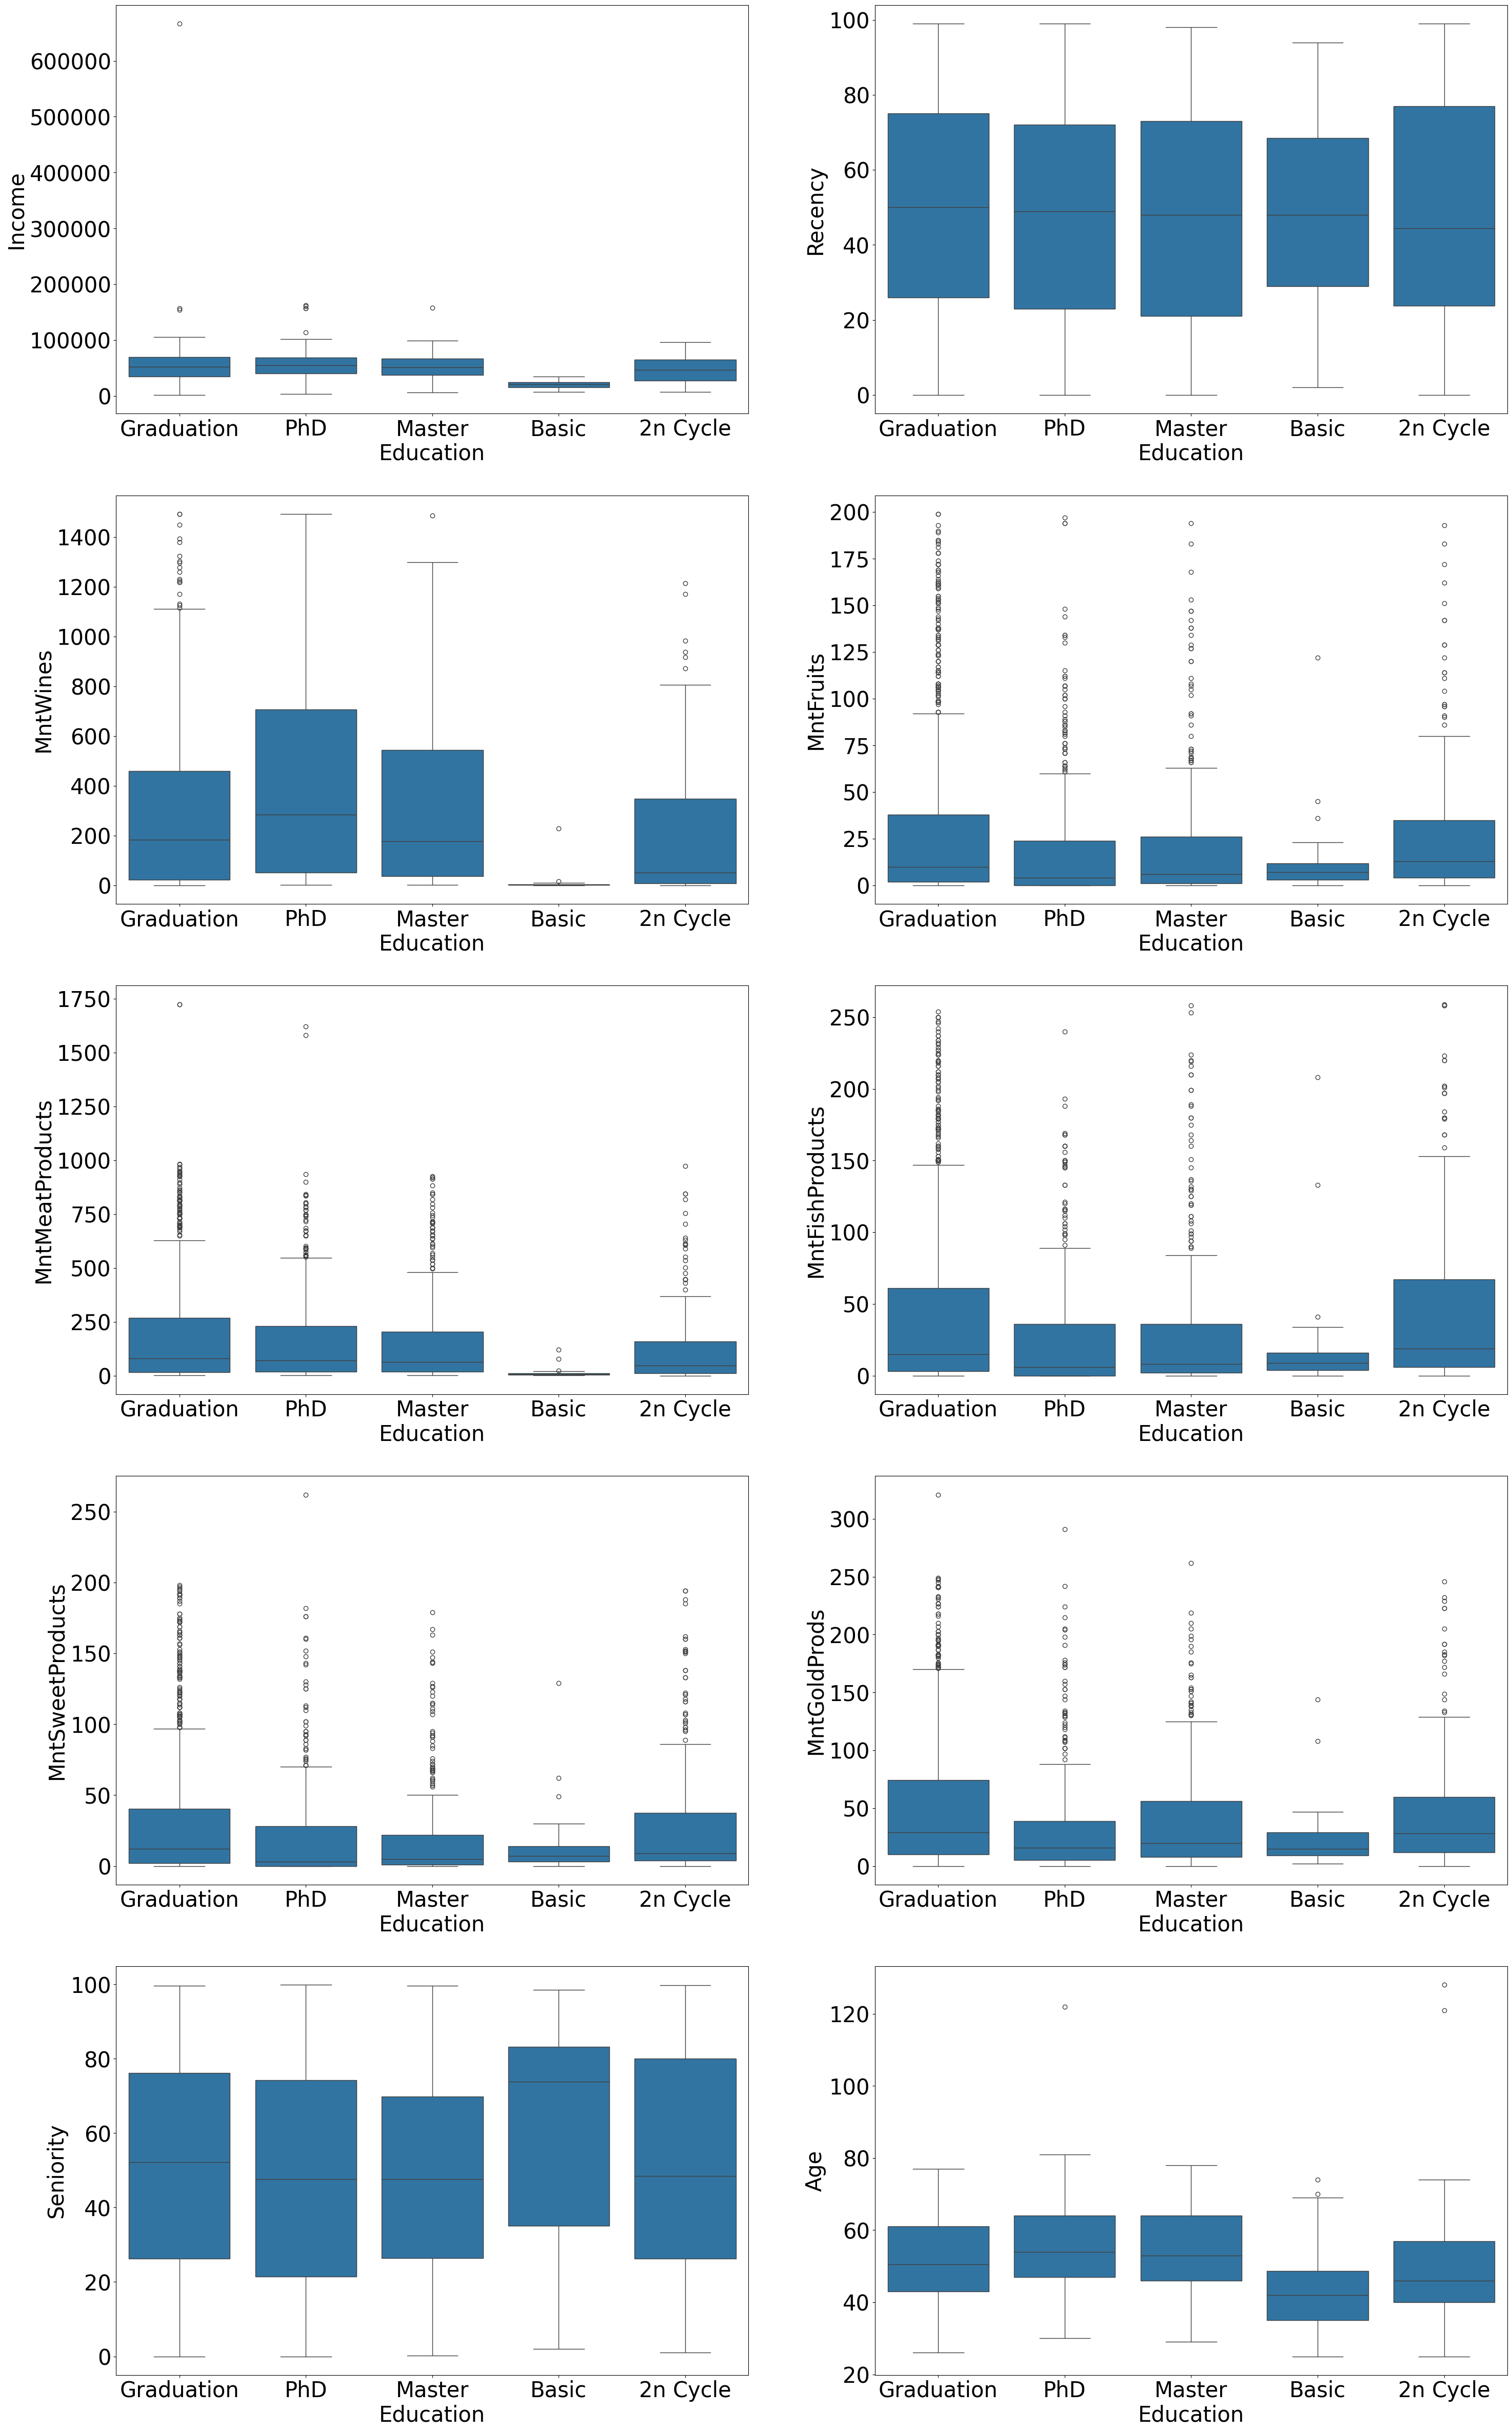

In [18]:
# Boxplot for all continuous features - by education
grh_per_row = 2
fig, ax = plt.subplots(len(col_cont)//grh_per_row, grh_per_row, figsize=(35, 60))

for count, feature in enumerate(col_cont, 0):
    data_copy = data.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row

    sns.boxplot(x='Education', y=feature, data=data_copy, ax=ax[row, col])

    # Set labels and axis labels font size
    ax[row, col].set_xlabel('Education', fontsize=30)
    ax[row, col].set_ylabel(feature, fontsize=30)
    ax[row, col].tick_params(axis='both', labelsize=30)

plt.show()

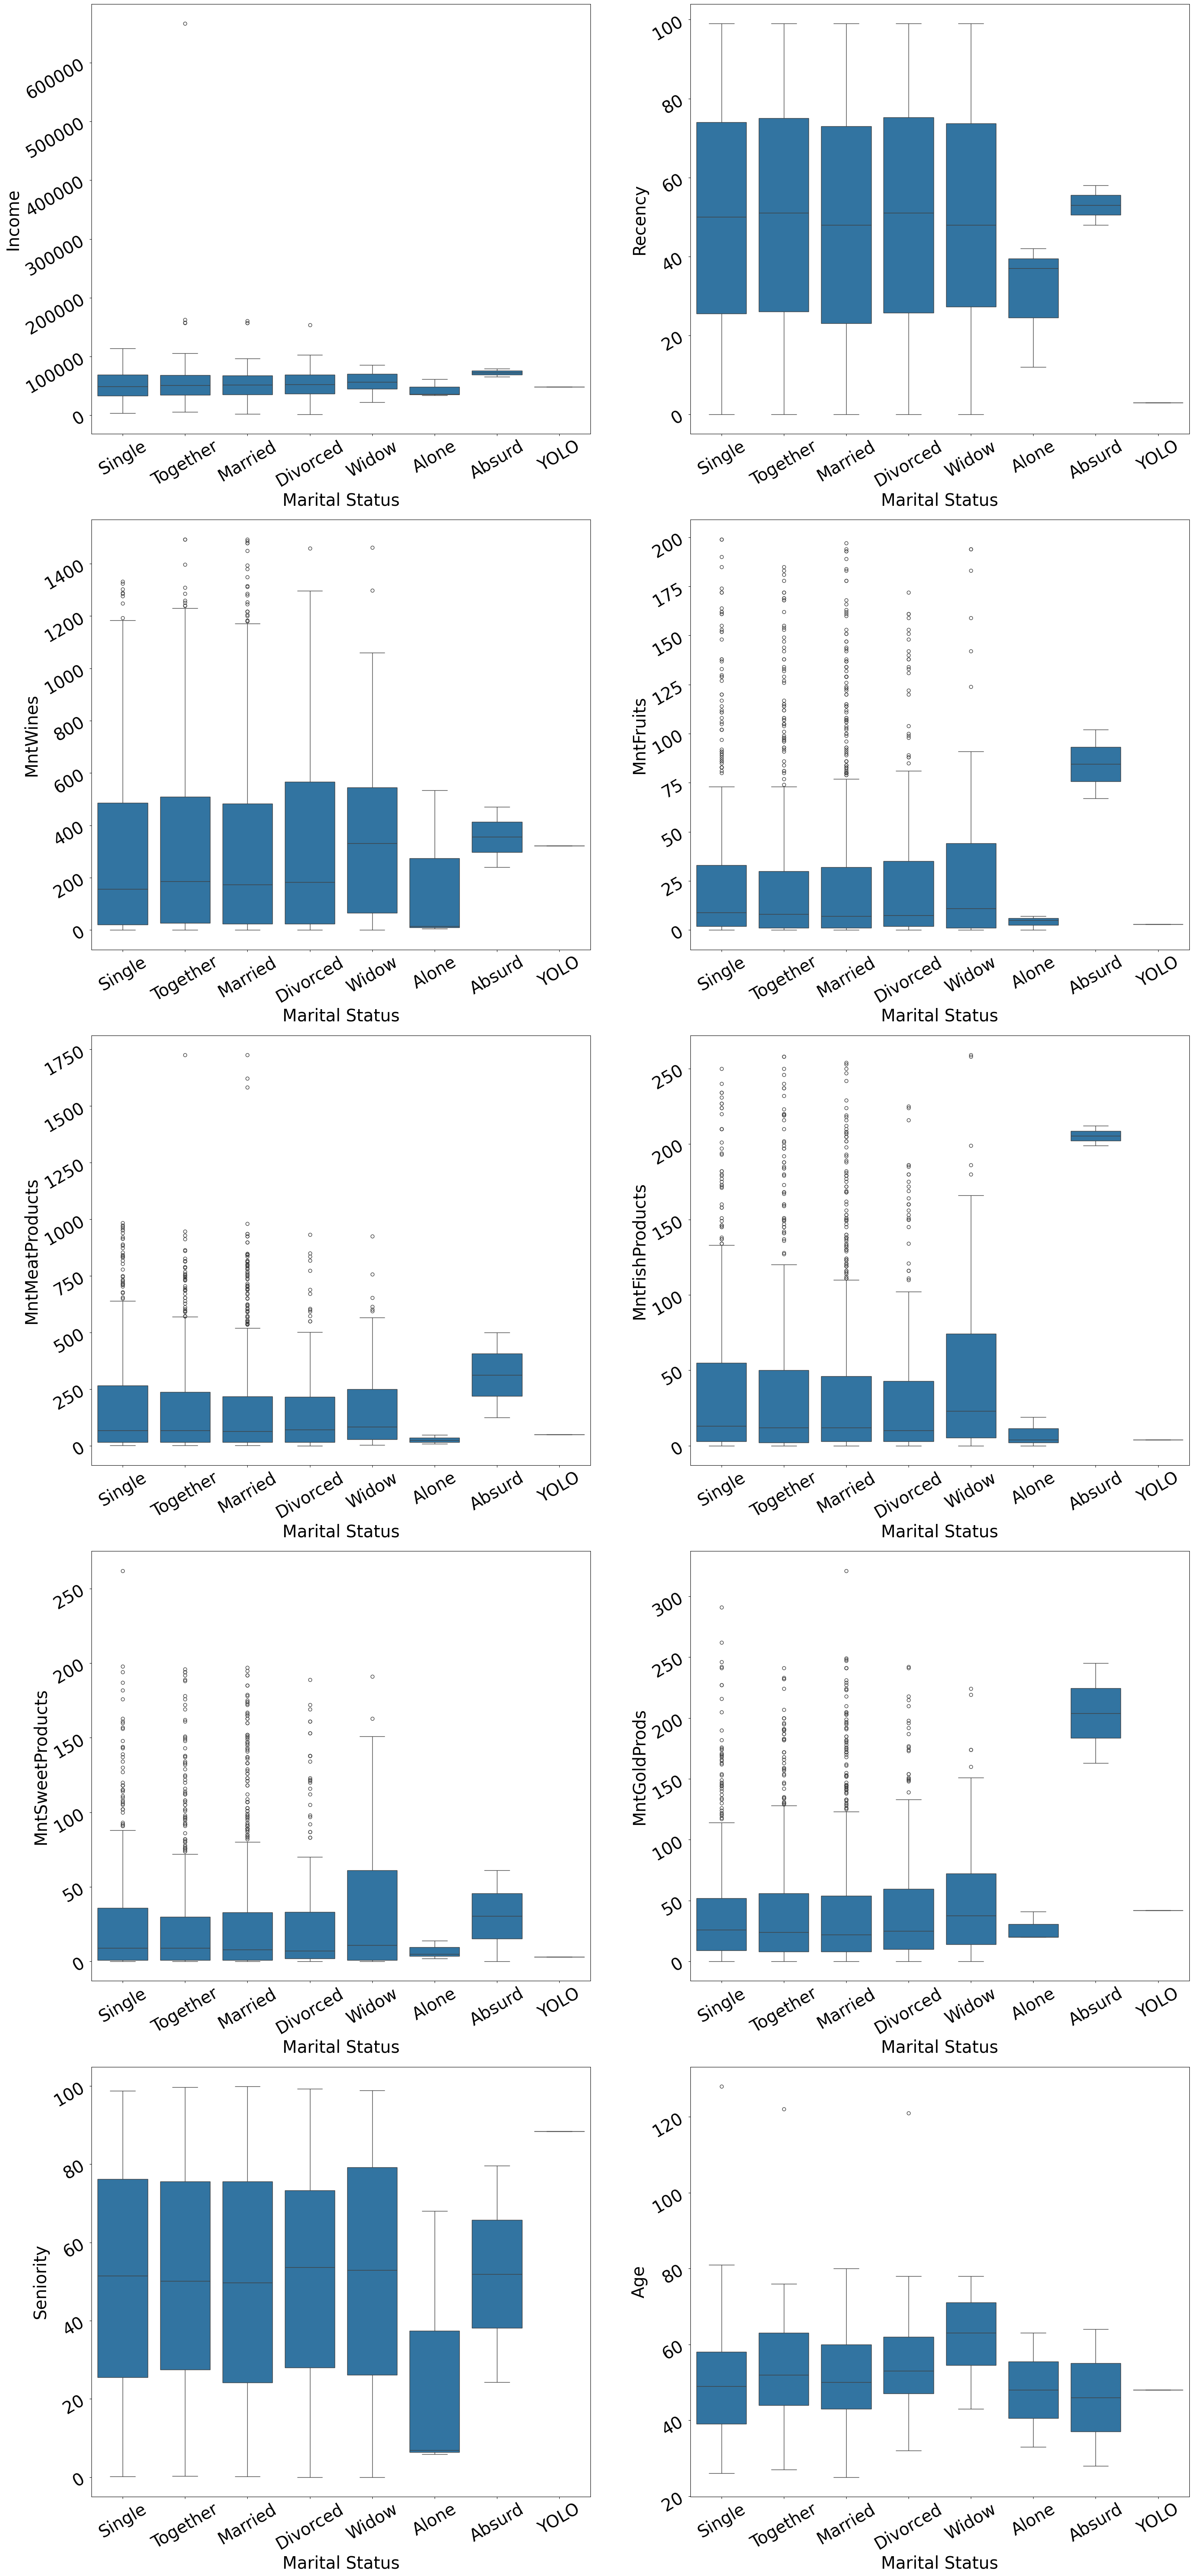

In [19]:
#  Boxplot for all continuous features - by marital status
grh_per_row =2
fig, ax = plt.subplots(len(col_cont)//grh_per_row,grh_per_row, figsize = (35, 80))

for count, feature in enumerate(col_cont, 0):
       data_copy= data.copy()
       row =count // grh_per_row
       col=(count )% grh_per_row    
       sns.boxplot(x='Marital_Status', y=feature, data=data_copy, ax=ax[row, col])
        
       # Set labels and axis labels font size
       ax[row, col].set_xlabel('Marital Status', fontsize=30)
       ax[row, col].set_ylabel(feature, fontsize=30)
       ax[row, col].tick_params(axis='both', labelsize=30, rotation=30)

plt.show()

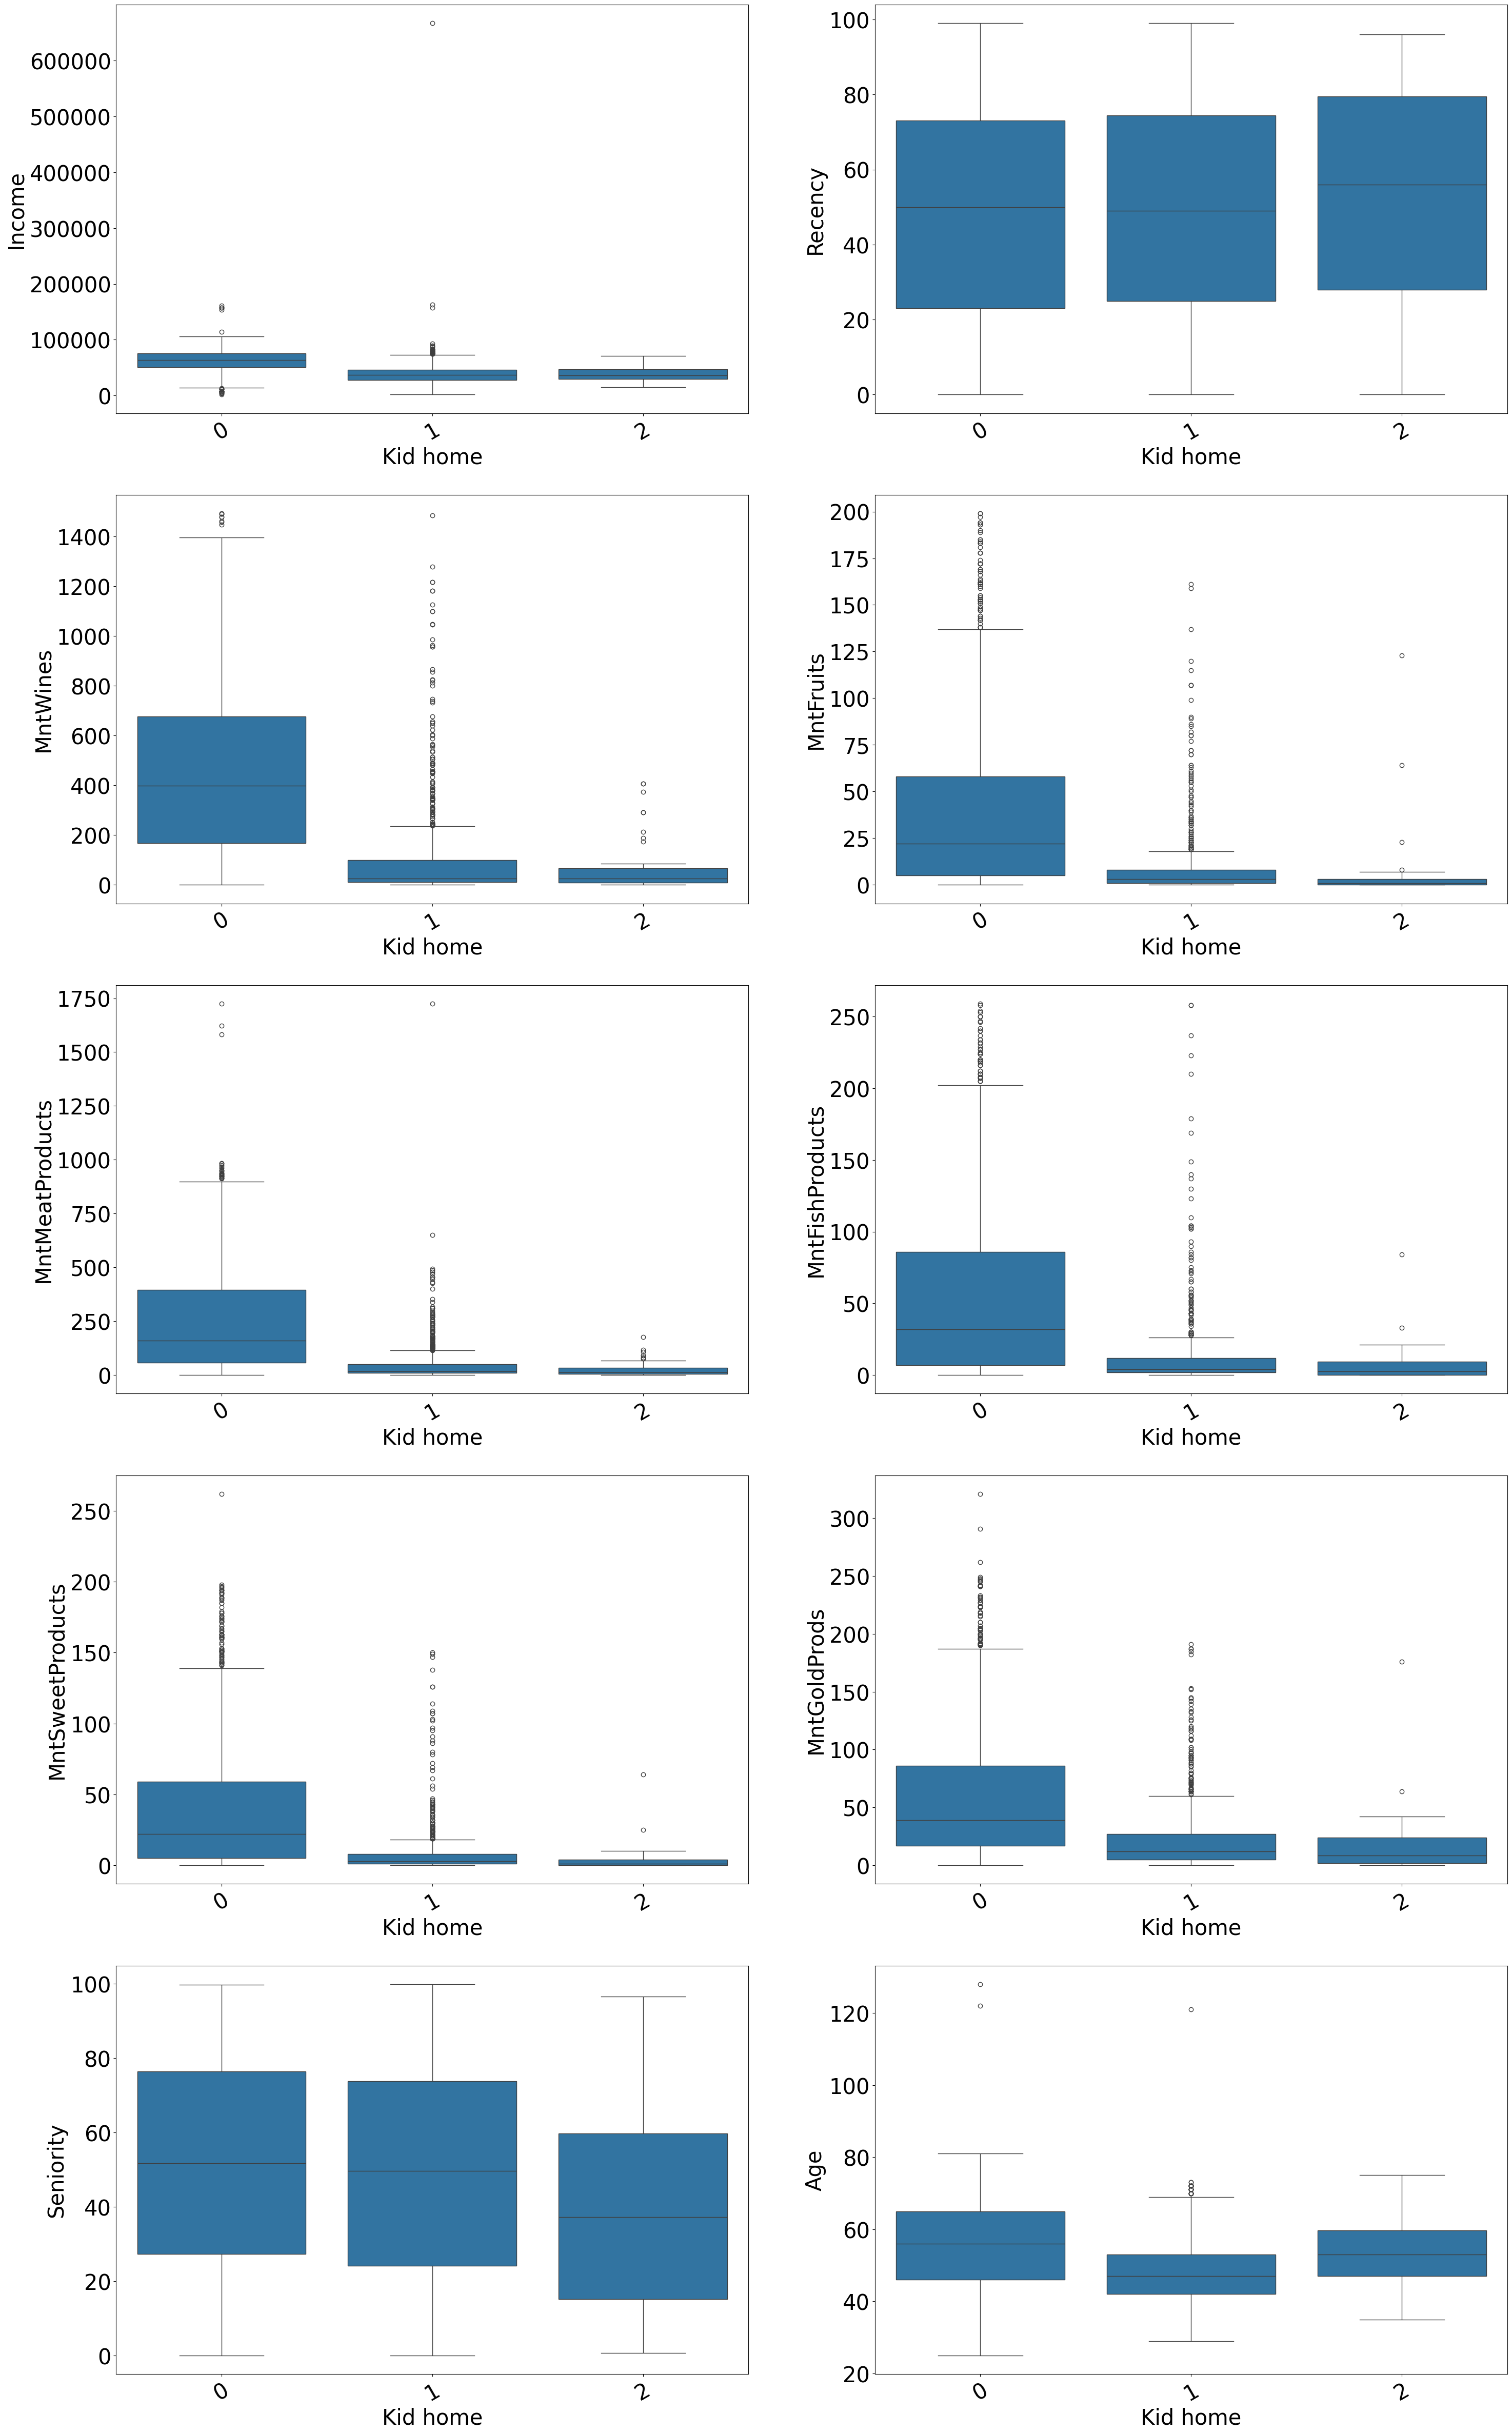

In [20]:
#  Boxplot for all continuous features - by Kidhome
grh_per_row = 2
fig, ax = plt.subplots(len(col_cont)//grh_per_row,grh_per_row, figsize = (35, 60))

for count, feature in enumerate(col_cont, 0):
       data_copy= data.copy()
       row =count // grh_per_row
       col=(count )% grh_per_row    
       sns.boxplot(x='Kidhome', y=feature, data=data_copy, ax=ax[row, col])
       ax[row, col].tick_params(axis='x', rotation=30)  # Rotate x-axis labels
        
       # Set labels and axis labels font size
       ax[row, col].set_xlabel('Kid home', fontsize=30)
       ax[row, col].set_ylabel(feature, fontsize=30)
       ax[row, col].tick_params(axis='both', labelsize=30)
plt.show()

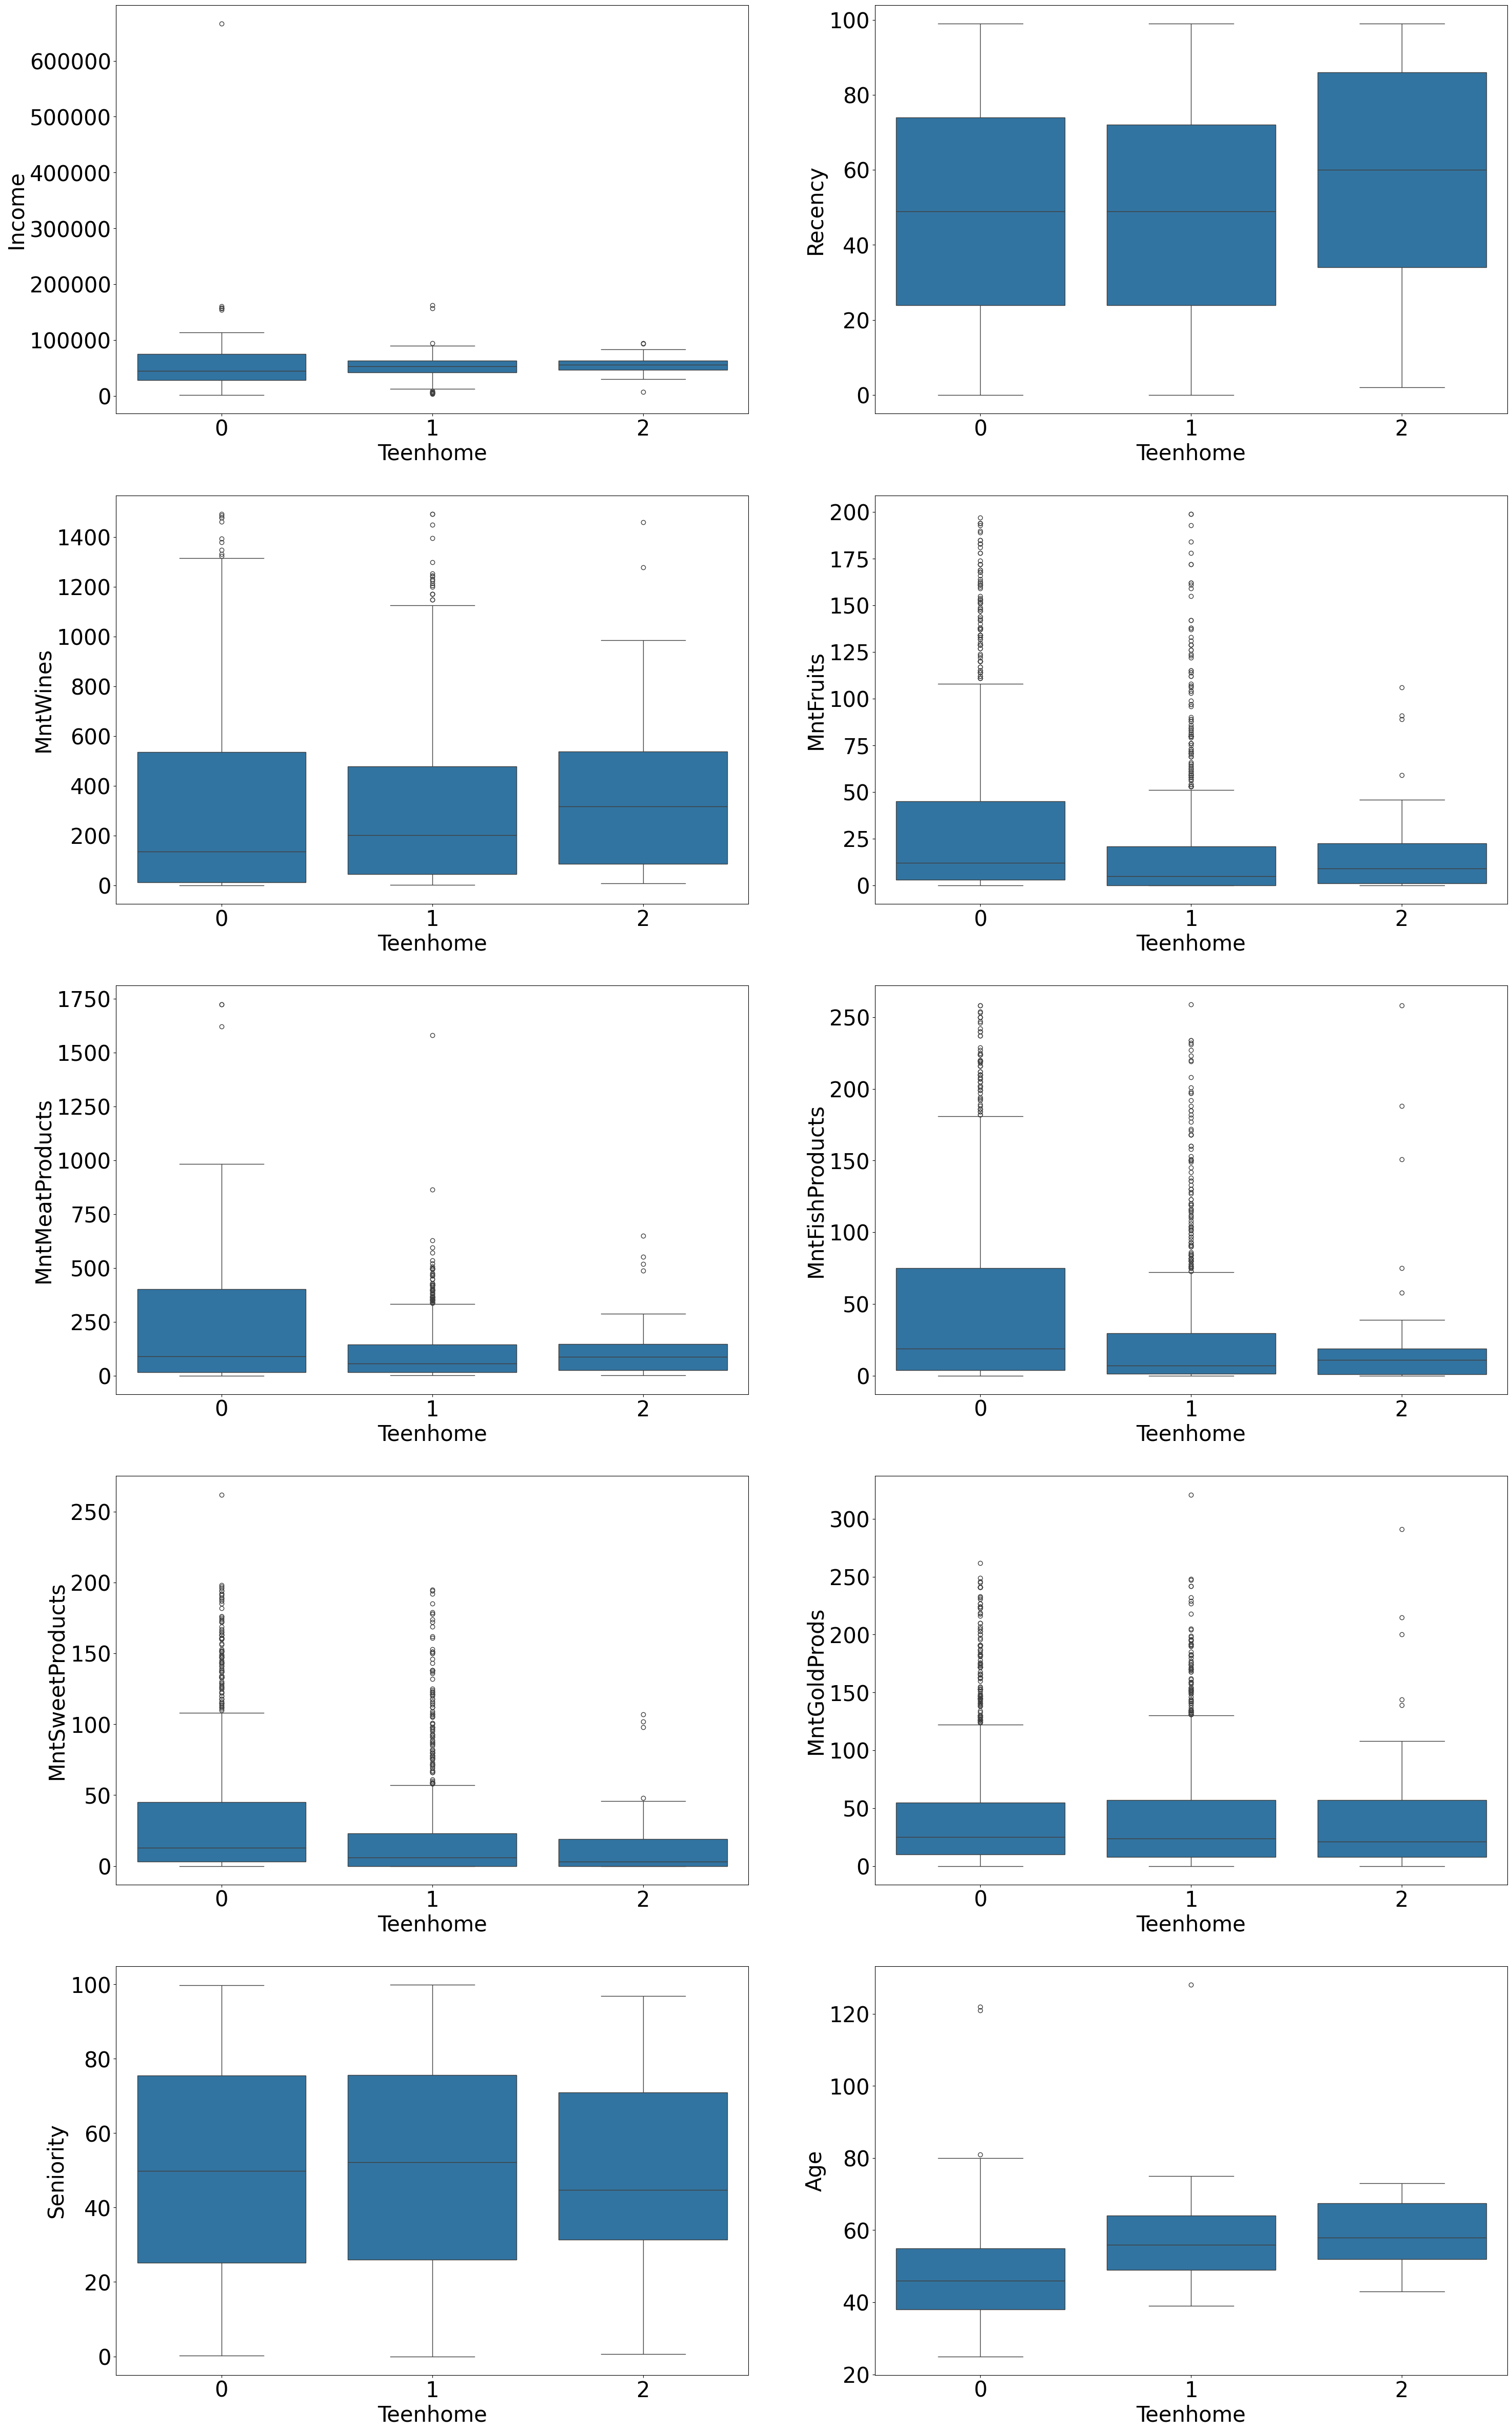

In [21]:
#  Boxplot for all continuous numerical features - by Teen home
grh_per_row = 2
fig, ax = plt.subplots(len(col_cont)//grh_per_row,grh_per_row, figsize = (35, 60))

for count, feature in enumerate(col_cont, 0):
       data_copy= data.copy()
       row =count // grh_per_row
       col=(count )% grh_per_row    
       sns.boxplot(x='Teenhome', y=feature, data=data_copy, ax=ax[row, col])
        
       # Set labels and axis labels font size
       ax[row, col].set_xlabel('Teenhome', fontsize=30)
       ax[row, col].set_ylabel(feature, fontsize=30)
       ax[row, col].tick_params(axis='both', labelsize=30)

plt.show()

#### Discrete Features

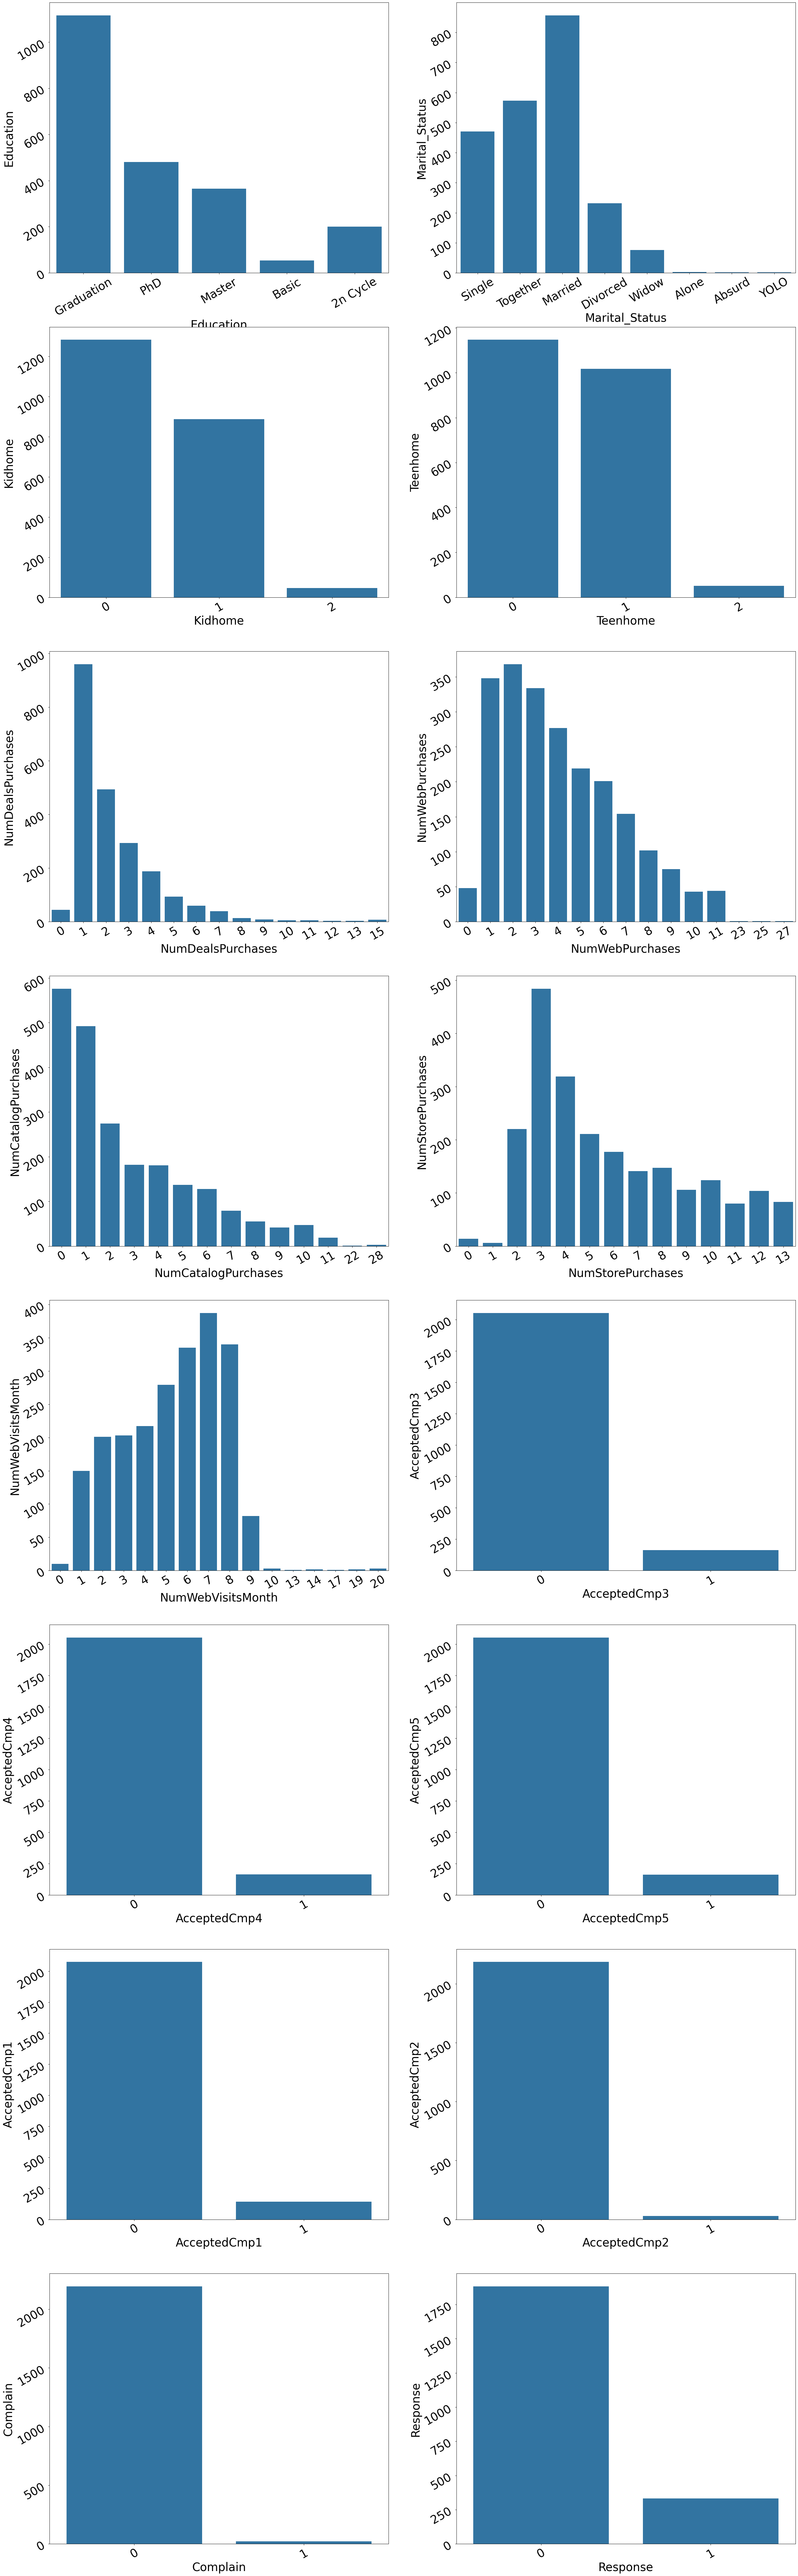

In [22]:
# Countplot for discrete features
grh_per_row = 2
fig, ax = plt.subplots(len(col_dis) // grh_per_row, grh_per_row, figsize=(35, 120))

for count, feature in enumerate(col_dis, 0):
    data_copy = data.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row
    sns.countplot(x=feature, data=data_copy,  ax=ax[row, col])  # Specify the axis for the countplot
    ax[row, col].set_xlabel(feature)
    ax[row, col].set_ylabel("Count") 
    
   # Set labels and axis labels font size
    ax[row, col].set_xlabel(feature, fontsize=30)
    ax[row, col].set_ylabel(feature, fontsize=30)
    ax[row, col].tick_params(axis='both', labelsize=30, rotation=30)

plt.show()

#### Distribution plots and statistic table:
  - Most **product sales** in the past 2 years are **heavily concentrated towards the lower end**. This trend is consistent with our initial data inspection. Specifically, the 25th percentile values for wine, meat, gold, fish, fruit,sweets, and are 23, 16, 9,3,1, 1. This suggests that a significant portion of customers made minimal purchases especially toward products other than wine and meat, indicating a **potential lack of repeat visits** or the store **doesn't sell much stuff except wines and meats**. Also, since this project we will use customer segmentation, it's good to keep this in mind and discover later which group contribute this abnormal pattern the most.
    
  - **Wine sales the best** (with mean of 304 and median of 174). The next one is **meat** (mean of 38 and median of 67).
    
  - Overall, the **customers are be mid aged to senior** (interquartile of 45 to 65).
    
    
#### Boxplots:
  - Produce **sales don't differ with education and marital status** too much. In wine sales, phd might spend more but it could relate to their a bit higer income.
    
  - People with **young kid (not teen) seem to spend less on wines**. 
    
  - There are a few **outliers**. (I didn't include outliers with exceptional large meat or sweet purchases because I suspect this is a wine store so those side/small product sales aren't my focus. I may combine or even drop those columns later):
  - 'Income'>600000 
  - 'Age'>100 
    
#### Countplots:
  - Around **65%** of customers **have a partner** (married or together)
    
  - Around **40%** of customers **have kids**.
    
  - A little less than **50%** customers **have teens**.
    
  - **Most people (>95%) at least have one deal purchase** but it concentrates at **1 deal purchase (around 40%)**.
    
  - Overall, people do slightly **more store purchase than than the web. The least one is catalog**.
    
  - Number of **web visits last month** concentrated at the **range of 5-8**.
    
  - Campaign acception rate overall is low.

## 2. Data preprocessing for modeling

With the aim to **keep the number of features low and meaningful**, let's plan data preprocessing for this project:
    
### Feature Selection:<br>
  - '**AcceptedCamp' 1,2,3,4,5 and 'Response'** are quite sparse and convey similar information. Which campaign the customer accept isn't my focus. I'll create a **'Campaigns_Accepted'** field to **count the total** and exclude the rest.
    
  - **Fish, Fruit, Sweets, and Gold** are sold in very **small amounts** (suspecting this is a wine store with these as side products). Leaving them in would only confuse the distance measurement for customer clustering. I will **exclude them**. 
    
### Categorical Feature Encoding:<br>
   - **'Marital_Status'** has too many options. I am not interested in seeing very small subgroup behaviors for this project. I'll need to use one-hot encoding if I keep them all (because it's nominal), which would add too many unecessary dimensions. I'll divide it into **'coupled' vs. 'not coupled'**.
    
   - **'Education'** is an ordinal variable, so I will use a **label encoder**.
    
### Outliers:<br>
   - Remove the ones identified above.



#### **Feature selection and transformation**

In [23]:
# Combine Campaingns_Accepted
data["Campaigns_Accepted"] = data['AcceptedCmp3']+ data['AcceptedCmp4']+ data['AcceptedCmp5']+data['AcceptedCmp1']+data['AcceptedCmp2'] +data['Response']
data.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2',  'Response'], axis=1, inplace=True)

# Drop purchases other than wines and meats
data.drop(['MntFruits','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

# 'Maritcal_Status' to be bianary
data['Marital_Status']= data['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO', 'Widow','Single','Divorced'],'Not Coupled')
data['Marital_Status']= data['Marital_Status'].replace(['Married', 'Together'],'Coupled')

#### **Remove Outliers**

In [24]:
# Remove outliers
mask = ( data['Income'] <= 600000) & (data['Age'] <= 100) 
data = data[mask]

# Check record numbers after removel
print('Data shape after removing outliers: ', data.shape)

Data shape after removing outliers:  (2212, 17)


#### **Catogorical label encoding**

In [25]:
# Encode categorical features
categorical_features = ['Education', 'Marital_Status']
le=LabelEncoder()
for i in categorical_features:
    data[i]=data[[i]].apply(le.fit_transform)

#### **Feature Scaling**
I will try both **"MinMax" and "Standard"** and see how they do. 

In [26]:
# Feature Scaling
# MinMax
scaler = MinMaxScaler()
scaler.fit(data)
data_MinMax = pd.DataFrame(scaler.transform(data),columns= data.columns )

# Standard
scaler = StandardScaler()
scaler.fit(data)
data_std = pd.DataFrame(scaler.transform(data),columns= data.columns )

#### **Heatmap** to check correlations

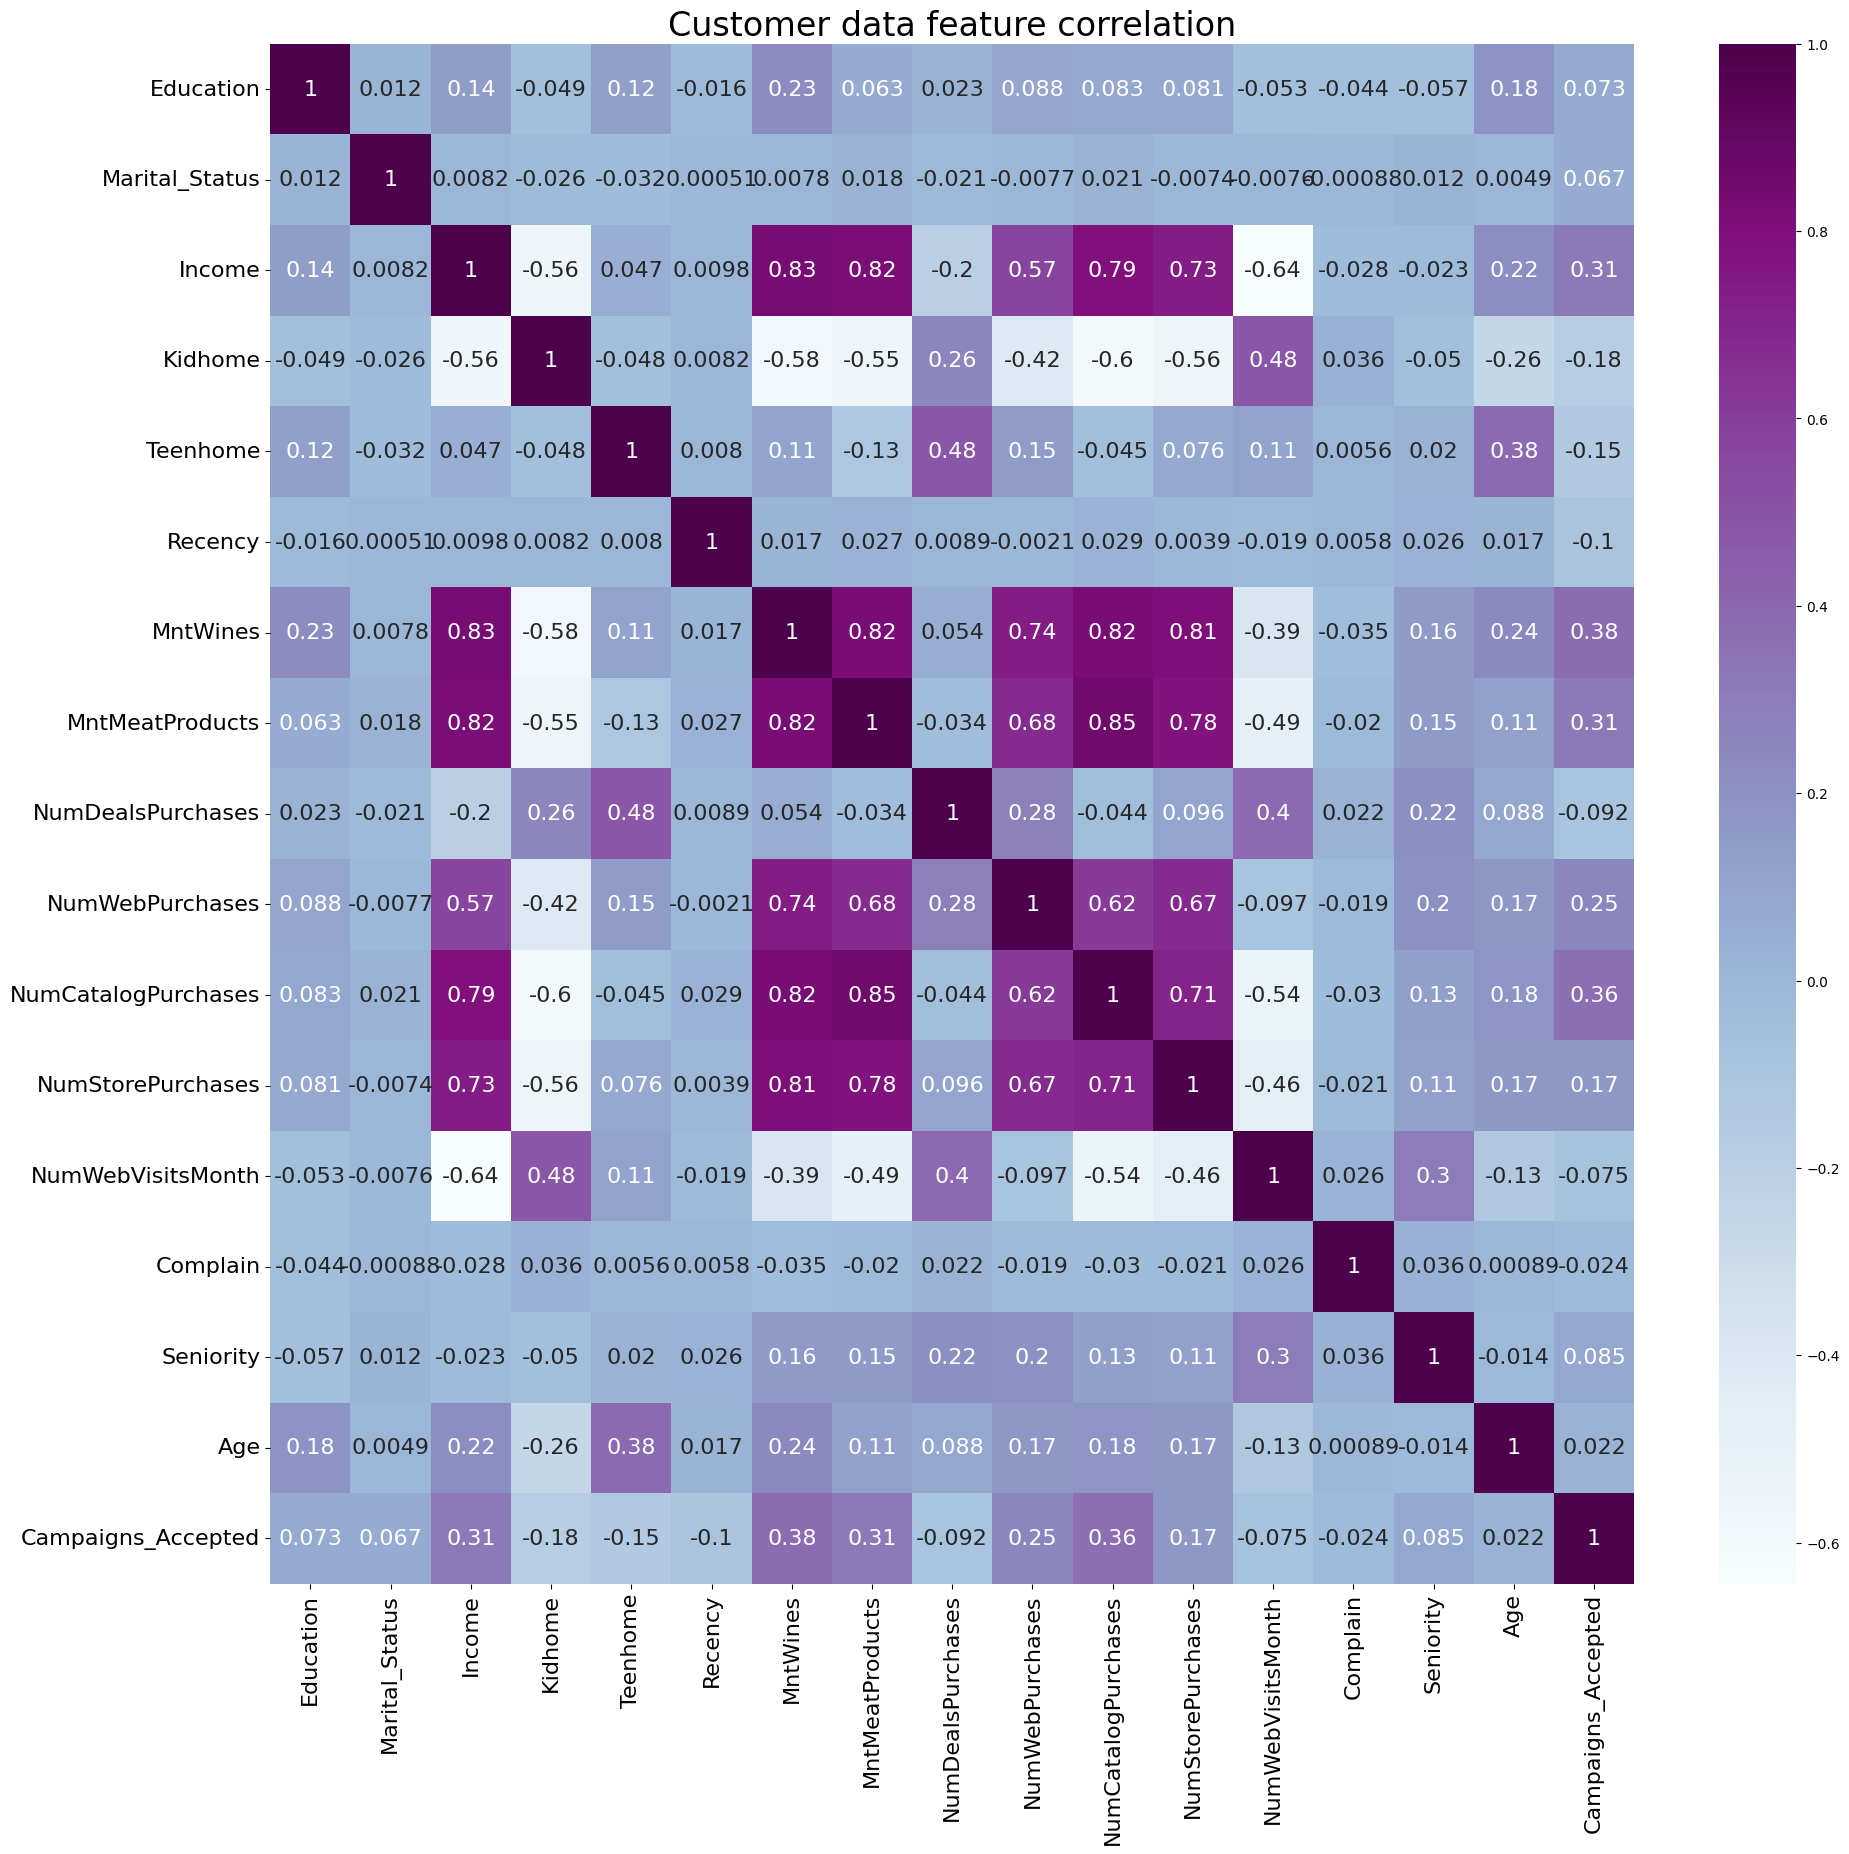

In [27]:
# Now all features are numerical, I can use heatmap to check feature correlations
corr = data.corr(method='spearman')
plt.figure(figsize=(22, 20))
plt.title("Customer data feature correlation", fontsize=24)
sns.heatmap(data=corr, annot=True, cmap="BuPu", annot_kws={"size": 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

- A few **moderate to highly correlated features** (I define |r| > 0.7 as Strong, 0.5<|r|<0.7: Moderately):
  - **'Income'， 'MntWines','MntMeatProducts', 'NumCatalogPurchases', 'NumStorePurchases'** have **strong positive correlations**.
    
  - **'Kidhome'** has **moderate negative correlations** with **'Income'** and **all products purchases**.
    
  - **'Kidhome'** has **moderate positive correlations** with **'NumWebVisitsMonth'**. (People with kids visit the webs a lot but hesitate to make purchases? Who are they?)
    
  - **'Teenhome'** has **moderate positive correlations** with **'NumDealsPurchases'** (People with teens do more deal purchases? What cause this? Note correlation isn't the same as causation)
    
  - **'NumWebVisitsMonth'** has **moderate negative correlations** with **'NumCatalogPurchases', 'NumStorePurchases'** (People visit web a lot tends to do less catalog or store purchase? Who are they?)
   
  - **'NumWebVisitsMonth'** has **moderate positive correlations** with **'Kidhome'** (as mentioned above) and **'NumDealsPurchases'**. (People with kids like to visit webs? People visit webs more do more deal purchases?)
 

## 3. Model building and training

### 3.1 Principal Component Analysis (PCA)

Let's **build and visualize PCA** for MinMax and Standard scaled data. We will then look at PCA in 2-D and decide which scaling method to use. 

In [28]:
# PCA with 2-D for visualization

# MinMax scaled data
pca_MinMax = PCA(n_components=2)
pca_MinMax.fit(data_MinMax)
PCA_viz_MinMax = pd.DataFrame(pca_MinMax.transform(data_MinMax), columns=(["Dimension 1","Dimension 2"]))

# Standard scaled data
pca_std = PCA(n_components=2)
pca_std.fit(data_std)
PCA_viz_std =    pd.DataFrame(pca_std.transform(data_std), columns=(["Dimension 1","Dimension 2"]))


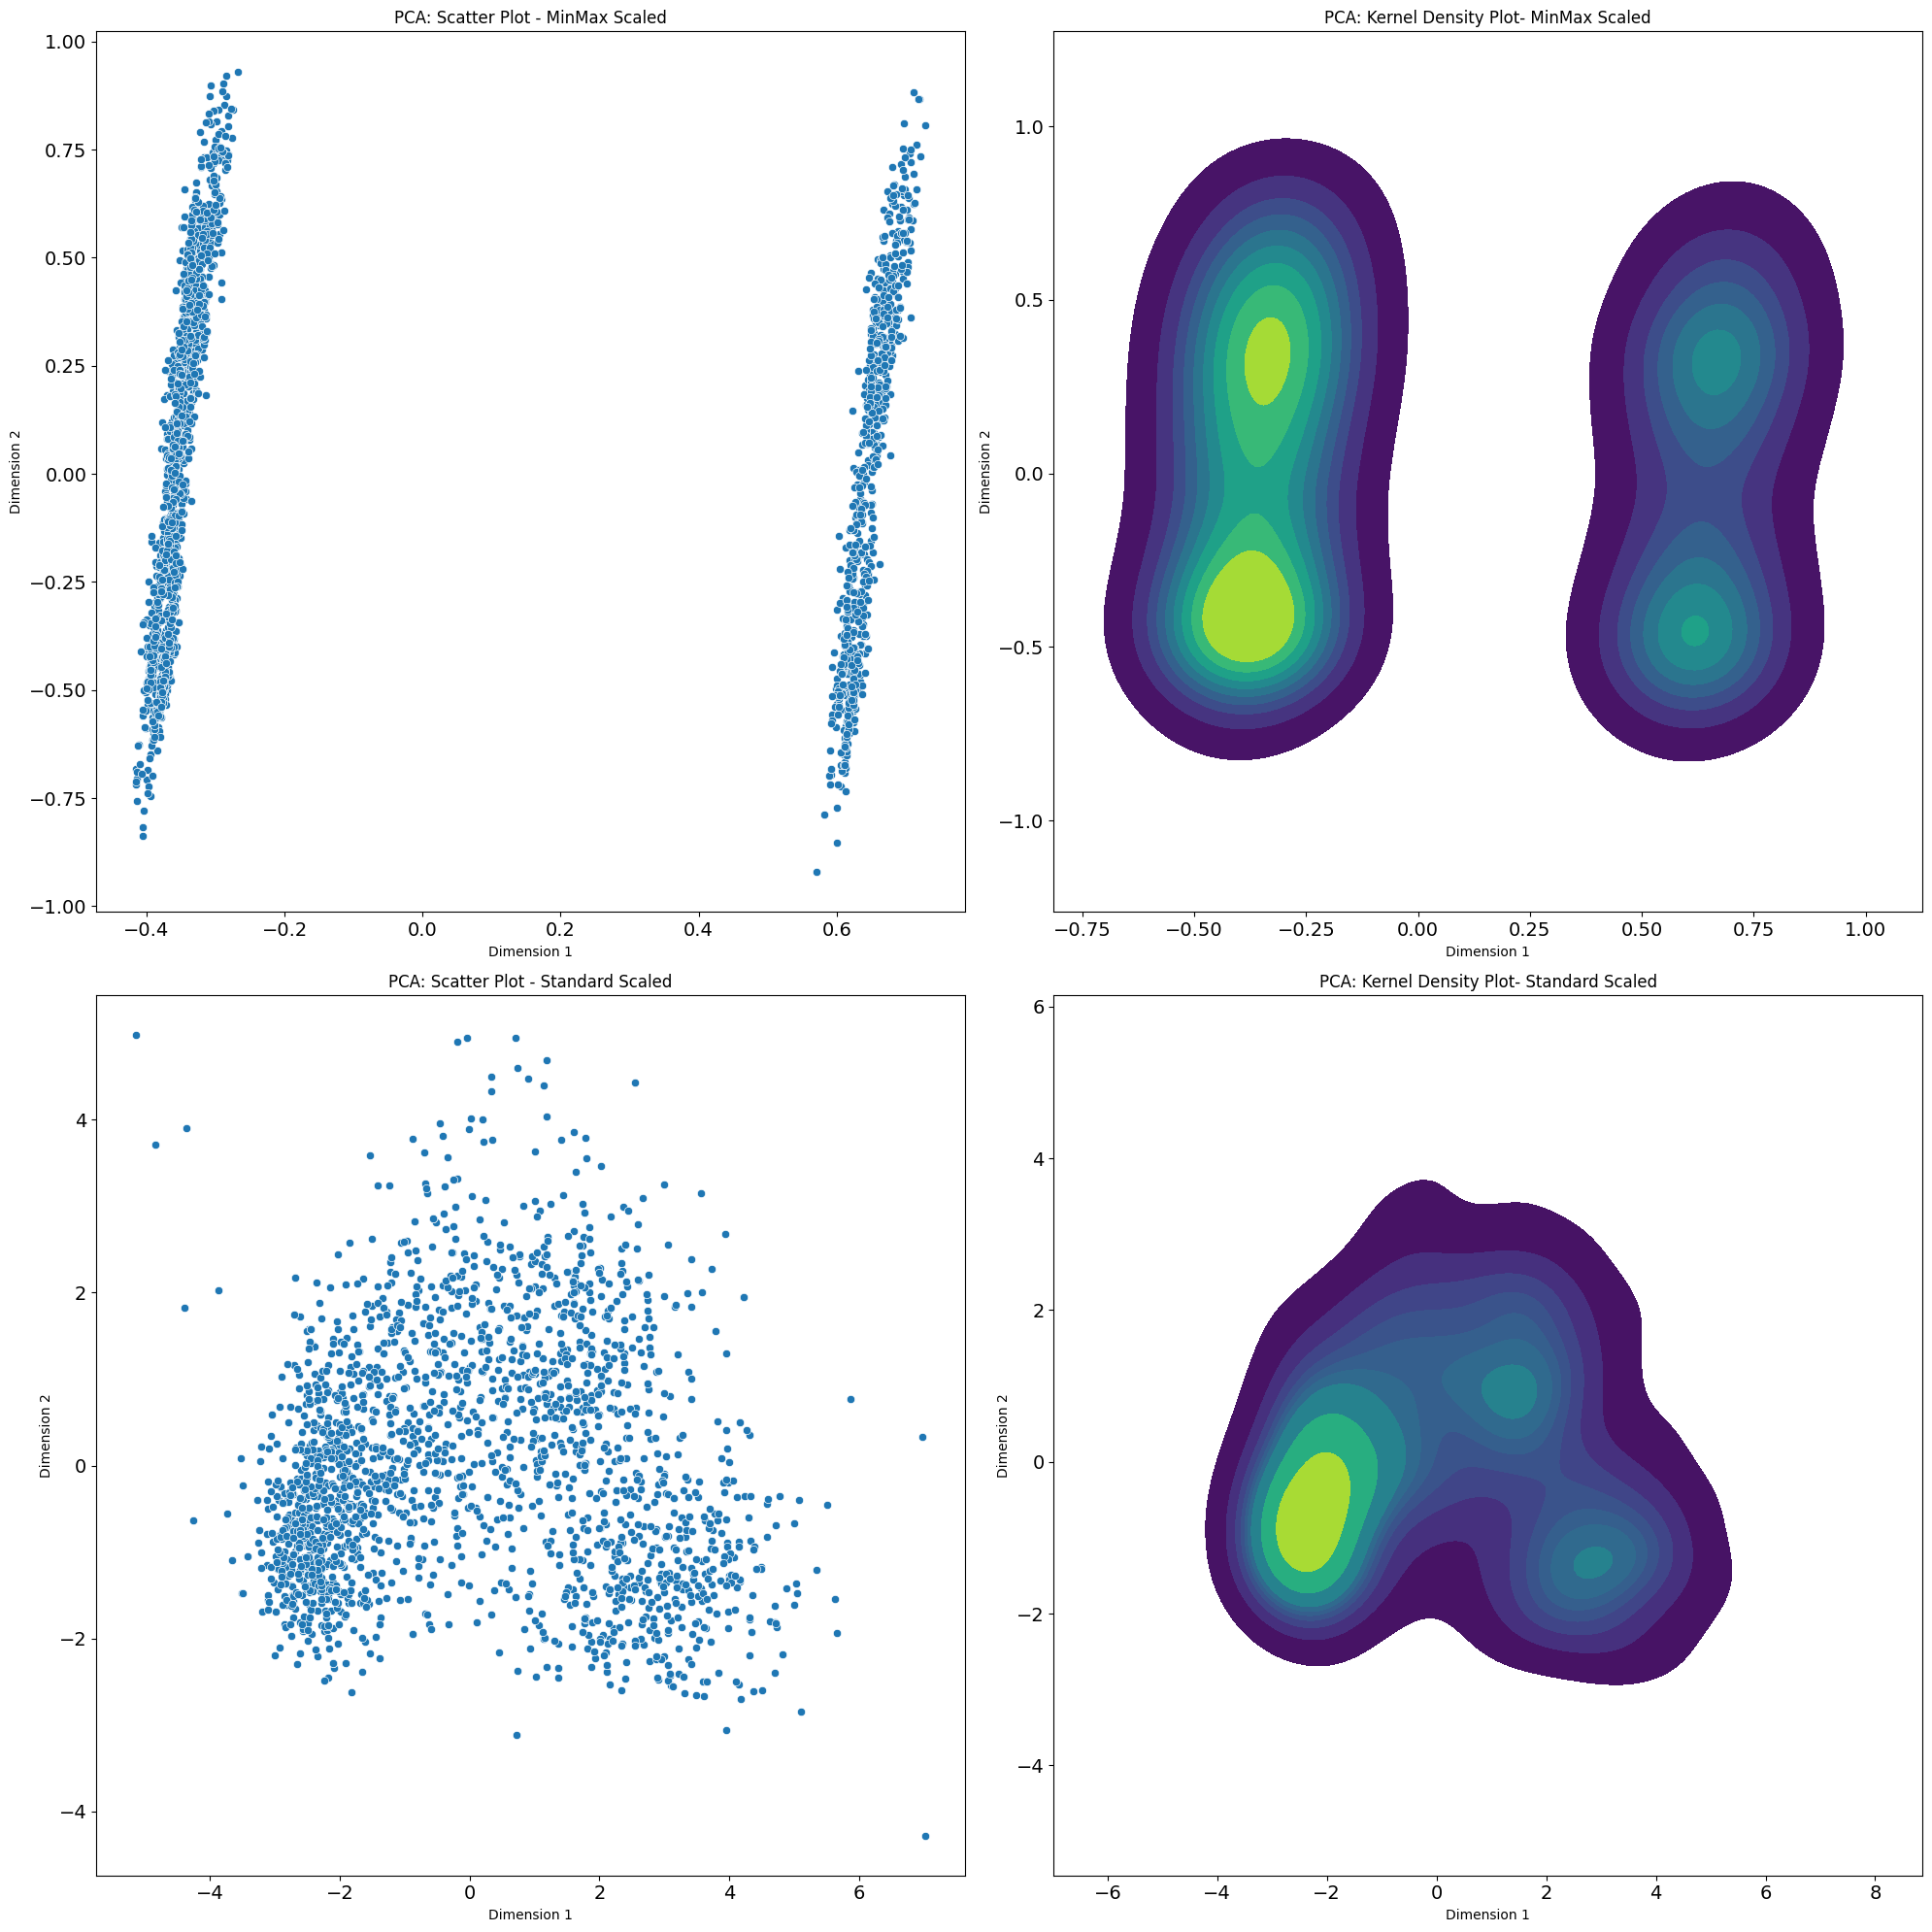

In [29]:
# Visualize data with 2-D PCA with scaled data
fig, axes = plt.subplots(2, 2, figsize=(20, 20))


# MinMax scaling
# Scatter plot 
sns.scatterplot(x=PCA_viz_MinMax["Dimension 1"], y=PCA_viz_MinMax["Dimension 2"], ax=axes[0][0])
axes[0][0].set_title('PCA: Scatter Plot - MinMax Scaled')
axes[0][0].set_xlabel('Dimension 1')
axes[0][0].set_ylabel('Dimension 2')

# KDE plot 
sns.kdeplot(x=PCA_viz_MinMax ["Dimension 1"], y=PCA_viz_MinMax["Dimension 2"], cmap='viridis', fill=True, ax=axes[0][1])
axes[0][1].set_title('PCA: Kernel Density Plot- MinMax Scaled')
axes[0][1].set_xlabel('Dimension 1')
axes[0][1].set_ylabel('Dimension 2')


#Standard scaling
# Scatter plot 
sns.scatterplot(x=PCA_viz_std["Dimension 1"], y=PCA_viz_std["Dimension 2"], ax=axes[1][0])
axes[1][0].set_title('PCA: Scatter Plot - Standard Scaled')
axes[1][0].set_xlabel('Dimension 1')
axes[1][0].set_ylabel('Dimension 2')

# KDE plot 
sns.kdeplot(x=PCA_viz_std ["Dimension 1"], y=PCA_viz_std["Dimension 2"], cmap='viridis', fill=True, ax=axes[1][1])
axes[1][1].set_title('PCA: Kernel Density Plot- Standard Scaled')
axes[1][1].set_xlabel('Dimension 1')
axes[1][1].set_ylabel('Dimension 2')

# Adjust ticks font size
for ax in axes.flatten():
    ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()

#### MinMax or Standard?
- Observation: <br>
It seems **MinMax scaling is unsuitable** for this dataset, leading to two distinct clusters with a substantial distance of around 1. This discrepancy is attributed to the way MinMax scaling treats binary features, particularly by maintaining a constant distance of 1 between individuals in different categories.

- Explanation: <br>
Given the dataset's **predominantly continuous** nature with a **few discrete** variables, MinMax scaling tends to **overly emphasize the influence of these discrete features**(especially 0/1 binary). The **minimal variability in binary features** can result in an **imbalanced feature importance**.

- Decision:
I will use **Standard Scaling** because it provide a more balanced representation of feature importance.
    
#### Three clusters?
- Seems 3 clusters may work? Keep in mind here we have 2-D PCA. This may not be true with a different # of dimensions.

We've chosen the right scaling method. Now, let's discover **how many dimensions we want to keep for PCA**.

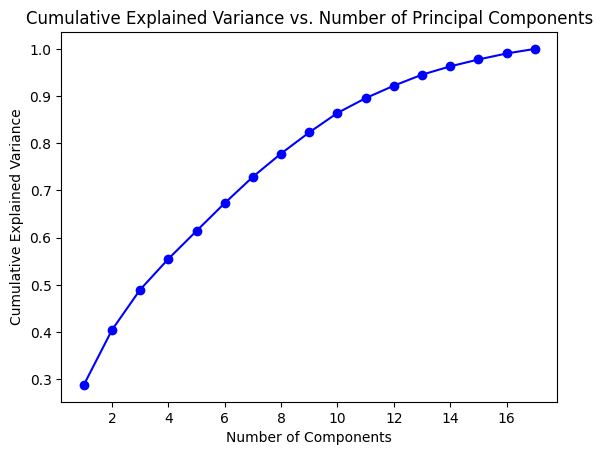

In [30]:
# Let's see %of variance vs. #of principal components we choose
cum_vars=[]
component_coefs=[]
for i in range(1, len(data_std.columns)+1): 
    pca = PCA(n_components=i)
    pca.fit(data_std)

    # Get the cumulative explained variance
    component_coefs.append(pca.components_[i-1,:])
    cum_var = np.cumsum(pca.explained_variance_ratio_)[-1]
    cum_vars.append(cum_var)
    
# Plot cumulative explained variance vs. number of components
plt.plot(range(1, len(data_std.columns)+1), cum_vars, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')

# Show the plot
plt.show()

Okay, seems the variance wouldn't be explained by a few dimensions. Thus, we **can't simply use the variance to choose # of dimensions**. 
In this case, a closer look at **how PCA built each principal components** (hence, the coefficients) would help us the decide. We want the model to include the dimensions that we think are relevant for clustering.

In [31]:
# Extract feature names
feature_names = data_std.columns

# Initialize an empty DataFrame with a multi-index
components_df = pd.DataFrame(index=feature_names)

# Iterate through each principal component
for i, component_coefs in enumerate(pca.components_):
    # Create a DataFrame for the current component
    component_df = pd.DataFrame({f'Coef_Component_{i+1}': component_coefs}, index=feature_names)
    
    # Concatenate the DataFrame to the main DataFrame
    components_df = pd.concat([components_df, component_df], axis=1)


In [32]:
# Take a look at principal components coefficients
components_df.style.background_gradient(cmap='Greys')

- In Principal Component Analysis (PCA), the coefficients of the eigenvectors in the pca.components_ attribute represent the loading of each original feature on the corresponding principal component. These coefficients indicate the contribution of each feature to the principal component and can be interpreted as the weights or importance of the features in constructing that principal component.
    
- 1st component: largest positive coefficients are on **income, MntWines, MntMeatProducts, NumCatalogPurchases, NumStorePurchases**. As we've seen in heatmap, those are highly correlated features. If the correlations are perfect (all 1s or move together in a linear fashion), we could know all the other variables when we know just one variable. In this case, we could chose 1 combined dimension that catches the largest variance and project all points to that dimension. Here, that dimension is the 1st component. So,the **higher value on this dimension would mean people with higher income, buy more wines and meat products, do more of catelog and store purchases**.

- 2nd component: largest positive coefficients are on **NumDealsPurchases,Teenhome, NumWebPurchases, NumWebVisitsMonth**. The higher value on this dimension would mean people who are more active on webs, have more teen at home, do more deal and web purchases, and visit web more often.

- 3rd component: largest positive coefficients are on **Seniority, NumWebVisitsMonth, Campaigns_Accepted**.

- 4th, 5th, 6th, 7th,8th, and 9th component put heavy positive coefficients on **recency, marital status, complain, education, kidhome, and campaign accepted**. As we've seen in the heatmap, most of those feature aren't highly correlated to other features so those features won't be captured in the previous PCA components. Those are all interesting dimensions that would help us discover interesing cluster personalities. I wil include them. 

- The first 9 components capture a little less than **85% variance**. I think it's good. 
    
- Components after 9 seem to be redundant or uninteresting. I will leave them out.

### 3.2 KMeans model building

#### How many clusters do we want for K-means? Elbow method
#### Let's build PCA with 9 dimensions and check 'elbow' picture to decide.

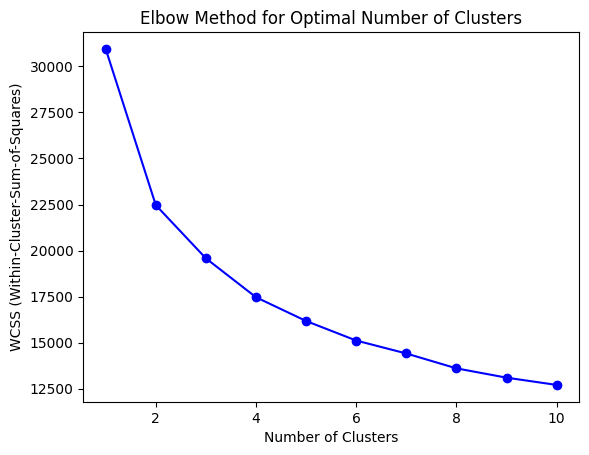

In [33]:
# Elbow method to decide on clustering #s

# PCA with 9 dimension
pca_std = PCA(n_components=9)
pca_std.fit(data_std)
PCA_std =  pd.DataFrame(pca_std.transform(data_std)) 

# Get within-cluster-sum-of-squares for Elbow Method 
wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(PCA_std)
    wcss.append(kmeans.inertia_)
    
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()

Seems it's 3 or 4 clusters. I've tried and clusters of 4 tends to give me a very small group of only around 20 people. Not good! I will use **3 clusters**.

In [34]:
# Run K-means with 3 clusters (and PCA with 9 dimensions)

# PCA 
pca_std = PCA(n_components=9)
pca_std.fit(data_std)
PCA_std =  pd.DataFrame(pca_std.transform(data_std)) 

# Kmeans and predictions
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
yhat_km = kmeans.fit_predict(PCA_std)
data["Clusters"]= yhat_km

## 5. Model Evaluations and Interpretations

### 5.1 Model Evaluation

#### First, let's take a look at clustering groups in 2-D PCA. 

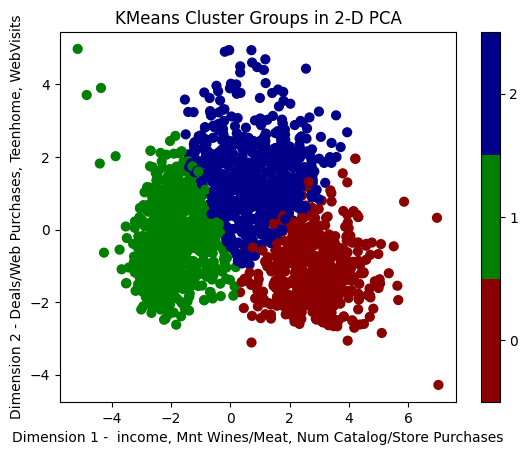

In [36]:
# Plot clustering groups in 2-D PCA

# 2-D PCA
pca_std = PCA(n_components=2)
pca_std.fit(data_std)
PCA_viz_std =    pd.DataFrame(pca_std.transform(data_std), columns=(["Dimension 1","Dimension 2"]))
x, y = PCA_viz_std['Dimension 1'],  PCA_viz_std['Dimension 2']

# Define custom colors and colormap for each cluster
cluster_colors = ['darkred', 'g', 'darkblue']
custom_cmap = ListedColormap(cluster_colors)

# Plotting the clusters in 2D
scatter = plt.scatter(x, y, s=40, c=data["Clusters"], marker='o', cmap=custom_cmap)
plt.title("KMeans Cluster Groups in 2-D PCA")
plt.xlabel('Dimension 1 -  income, Mnt Wines/Meat, Num Catalog/Store Purchases')
plt.ylabel('Dimension 2 - Deals/Web Purchases, Teenhome, WebVisits')

# Adding colorbar with discrete color labels
cbar = plt.colorbar(scatter, ticks=np.arange(len(cluster_colors)), boundaries=np.arange(len(cluster_colors) + 1) - 0.5, orientation='vertical')

plt.show()

I like what I see. The group counts are pretty even. There seem to be 3 distinct groups:

Let's check how many people are in each clusters next. 👇

/var/folders/gq/k4fbxlqj3pn9xzbr38x7rjl40000gn/T/ipykernel_13908/3604069534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette=custom_palette)


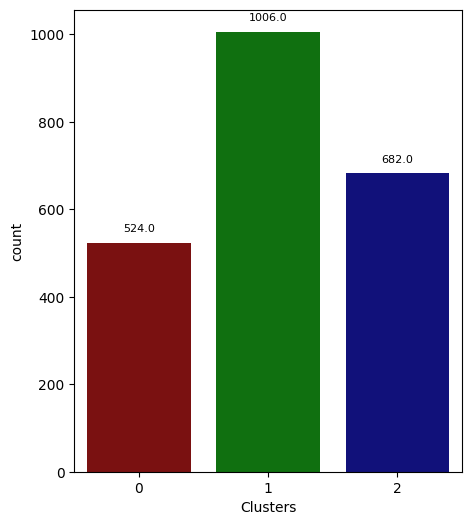

In [37]:
# Create the countplot
custom_palette = {'0': 'darkred', '1':'g', '2': 'darkblue'}

plt.figure(figsize=(5, 6))
pl = sns.countplot(x=data["Clusters"], palette=custom_palette)

# Annotate each bar with its count
for p in pl.patches:
    pl.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
plt.grid(False)
plt.show()

### 5.2 Model Interpretation and cluster personality analysis

- We've seen that the cluster seems to divide customers to group that seem to look good in 2-D and the portions of each groups are just right.
- Time to see if we can get find some **interesting characteristics of each group** and **what actions the store might take** accordingly. This is the goal of this project and is one of the **key tests** to see if PCA and Kmeans models work well.
- I will do some visualizations and conclude what I saw at the end.

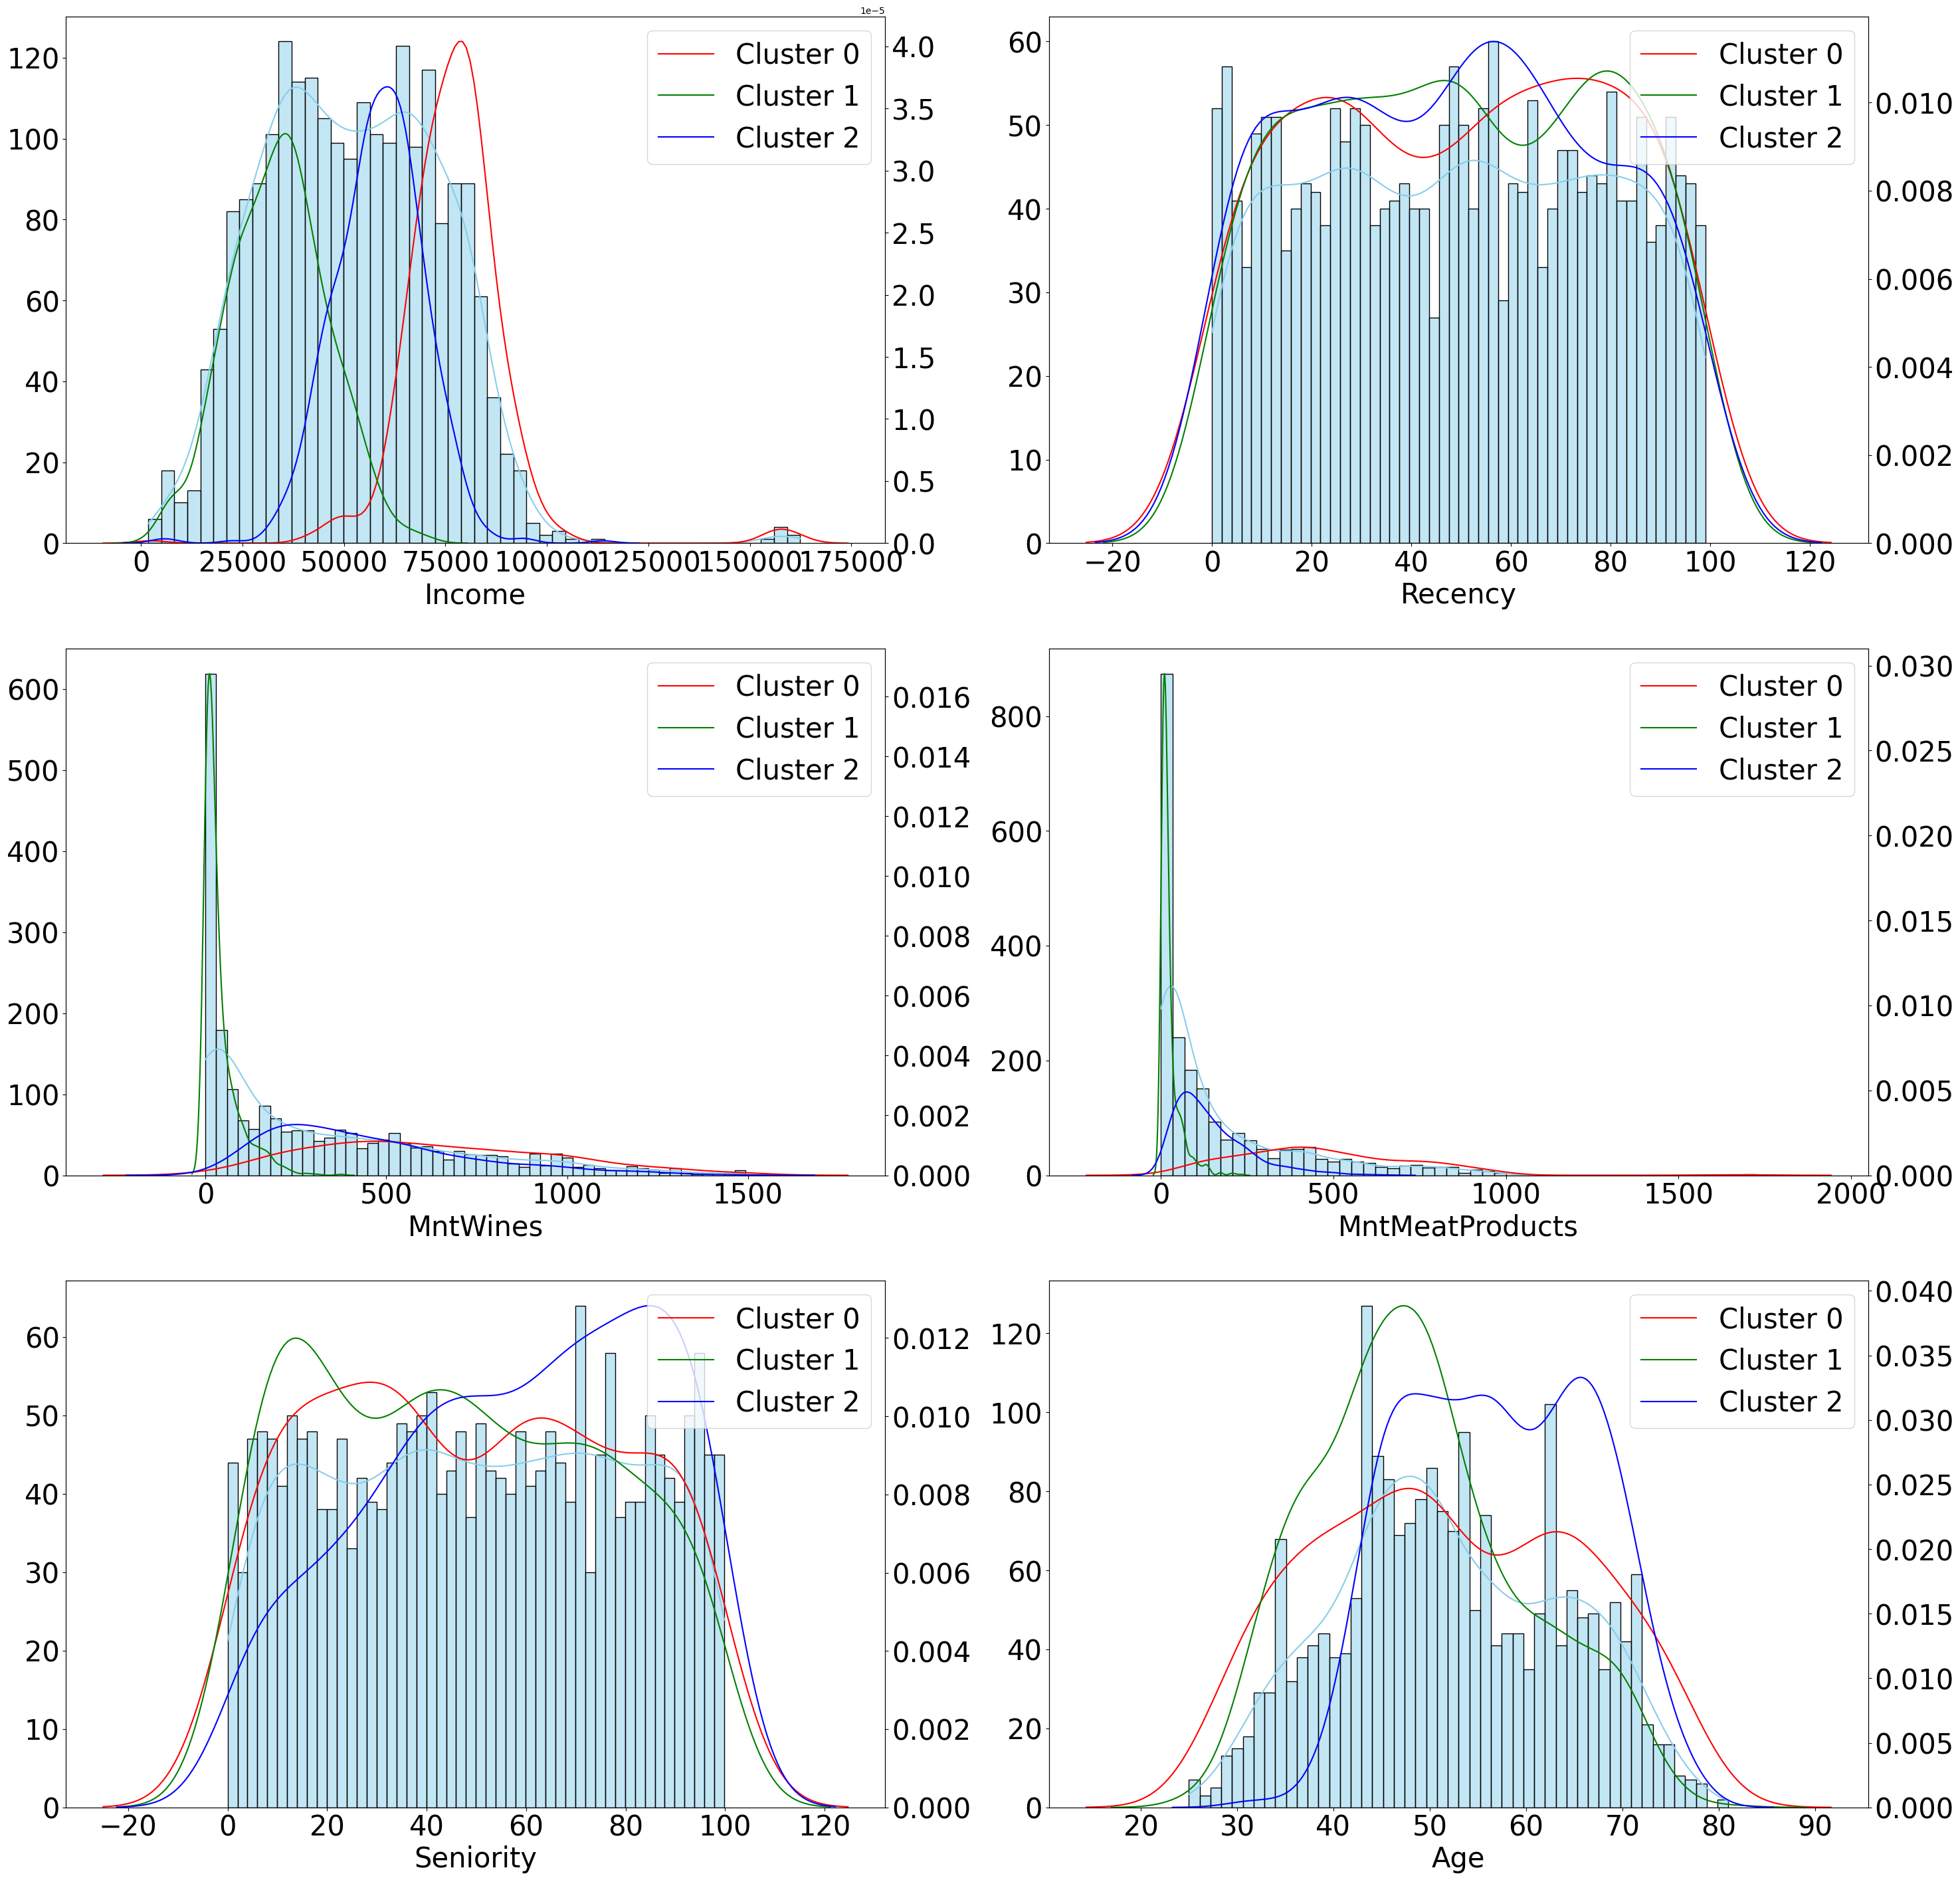

In [38]:
# Divide features again by continuous vs. discrete
col_cont = ['Income', 'Recency', 'MntWines', 'MntMeatProducts', 'Seniority', 'Age']
col_dis = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Campaigns_Accepted', 'Clusters']

# Histogram and KDE plot for continuous features
grh_per_row = 2
fig, ax = plt.subplots(len(col_cont) // grh_per_row, grh_per_row, figsize=(35, 35))

for count, feature in enumerate(col_cont, 0):
    data_copy = data.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row

    # Plot histogram with KDE on the primary y-axis
    sns.histplot(data_copy, x=feature, bins=50, kde=True, color='skyblue', ax=ax[row, col])
    ax[row, col].grid(False)
    ax[row, col].set_ylabel("")

    # Plot KDE on the secondary y-axis
    ax2 = ax[row, col].twinx()
    sns.kdeplot(data_copy[data['Clusters'] == 0][feature], color='red', ax=ax2, label='Cluster 0')
    sns.kdeplot(data_copy[data['Clusters'] == 1][feature], color='green', ax=ax2, label='Cluster 1')
    sns.kdeplot(data_copy[data['Clusters'] == 2][feature], color='blue', ax=ax2, label='Cluster 2')
    ax[row, col].set_xlabel(feature, fontsize=30)
    ax2.legend(loc='upper right', fontsize=30)
    ax2.grid(False)
    ax2.set_ylabel("")

    # Adjust axis label size and tick label size
    ax[row, col].tick_params(axis='both', labelsize=30)
    ax2.tick_params(axis='both', labelsize=30)

plt.show()


/var/folders/gq/k4fbxlqj3pn9xzbr38x7rjl40000gn/T/ipykernel_13908/3313996834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Clusters', y=feature, data=data, ax=ax[row, col], palette={'0': 'darkred', '1': 'g', '2': 'darkblue'})
/var/folders/gq/k4fbxlqj3pn9xzbr38x7rjl40000gn/T/ipykernel_13908/3313996834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Clusters', y=feature, data=data, ax=ax[row, col], palette={'0': 'darkred', '1': 'g', '2': 'darkblue'})
/var/folders/gq/k4fbxlqj3pn9xzbr38x7rjl40000gn/T/ipykernel_13908/3313996834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

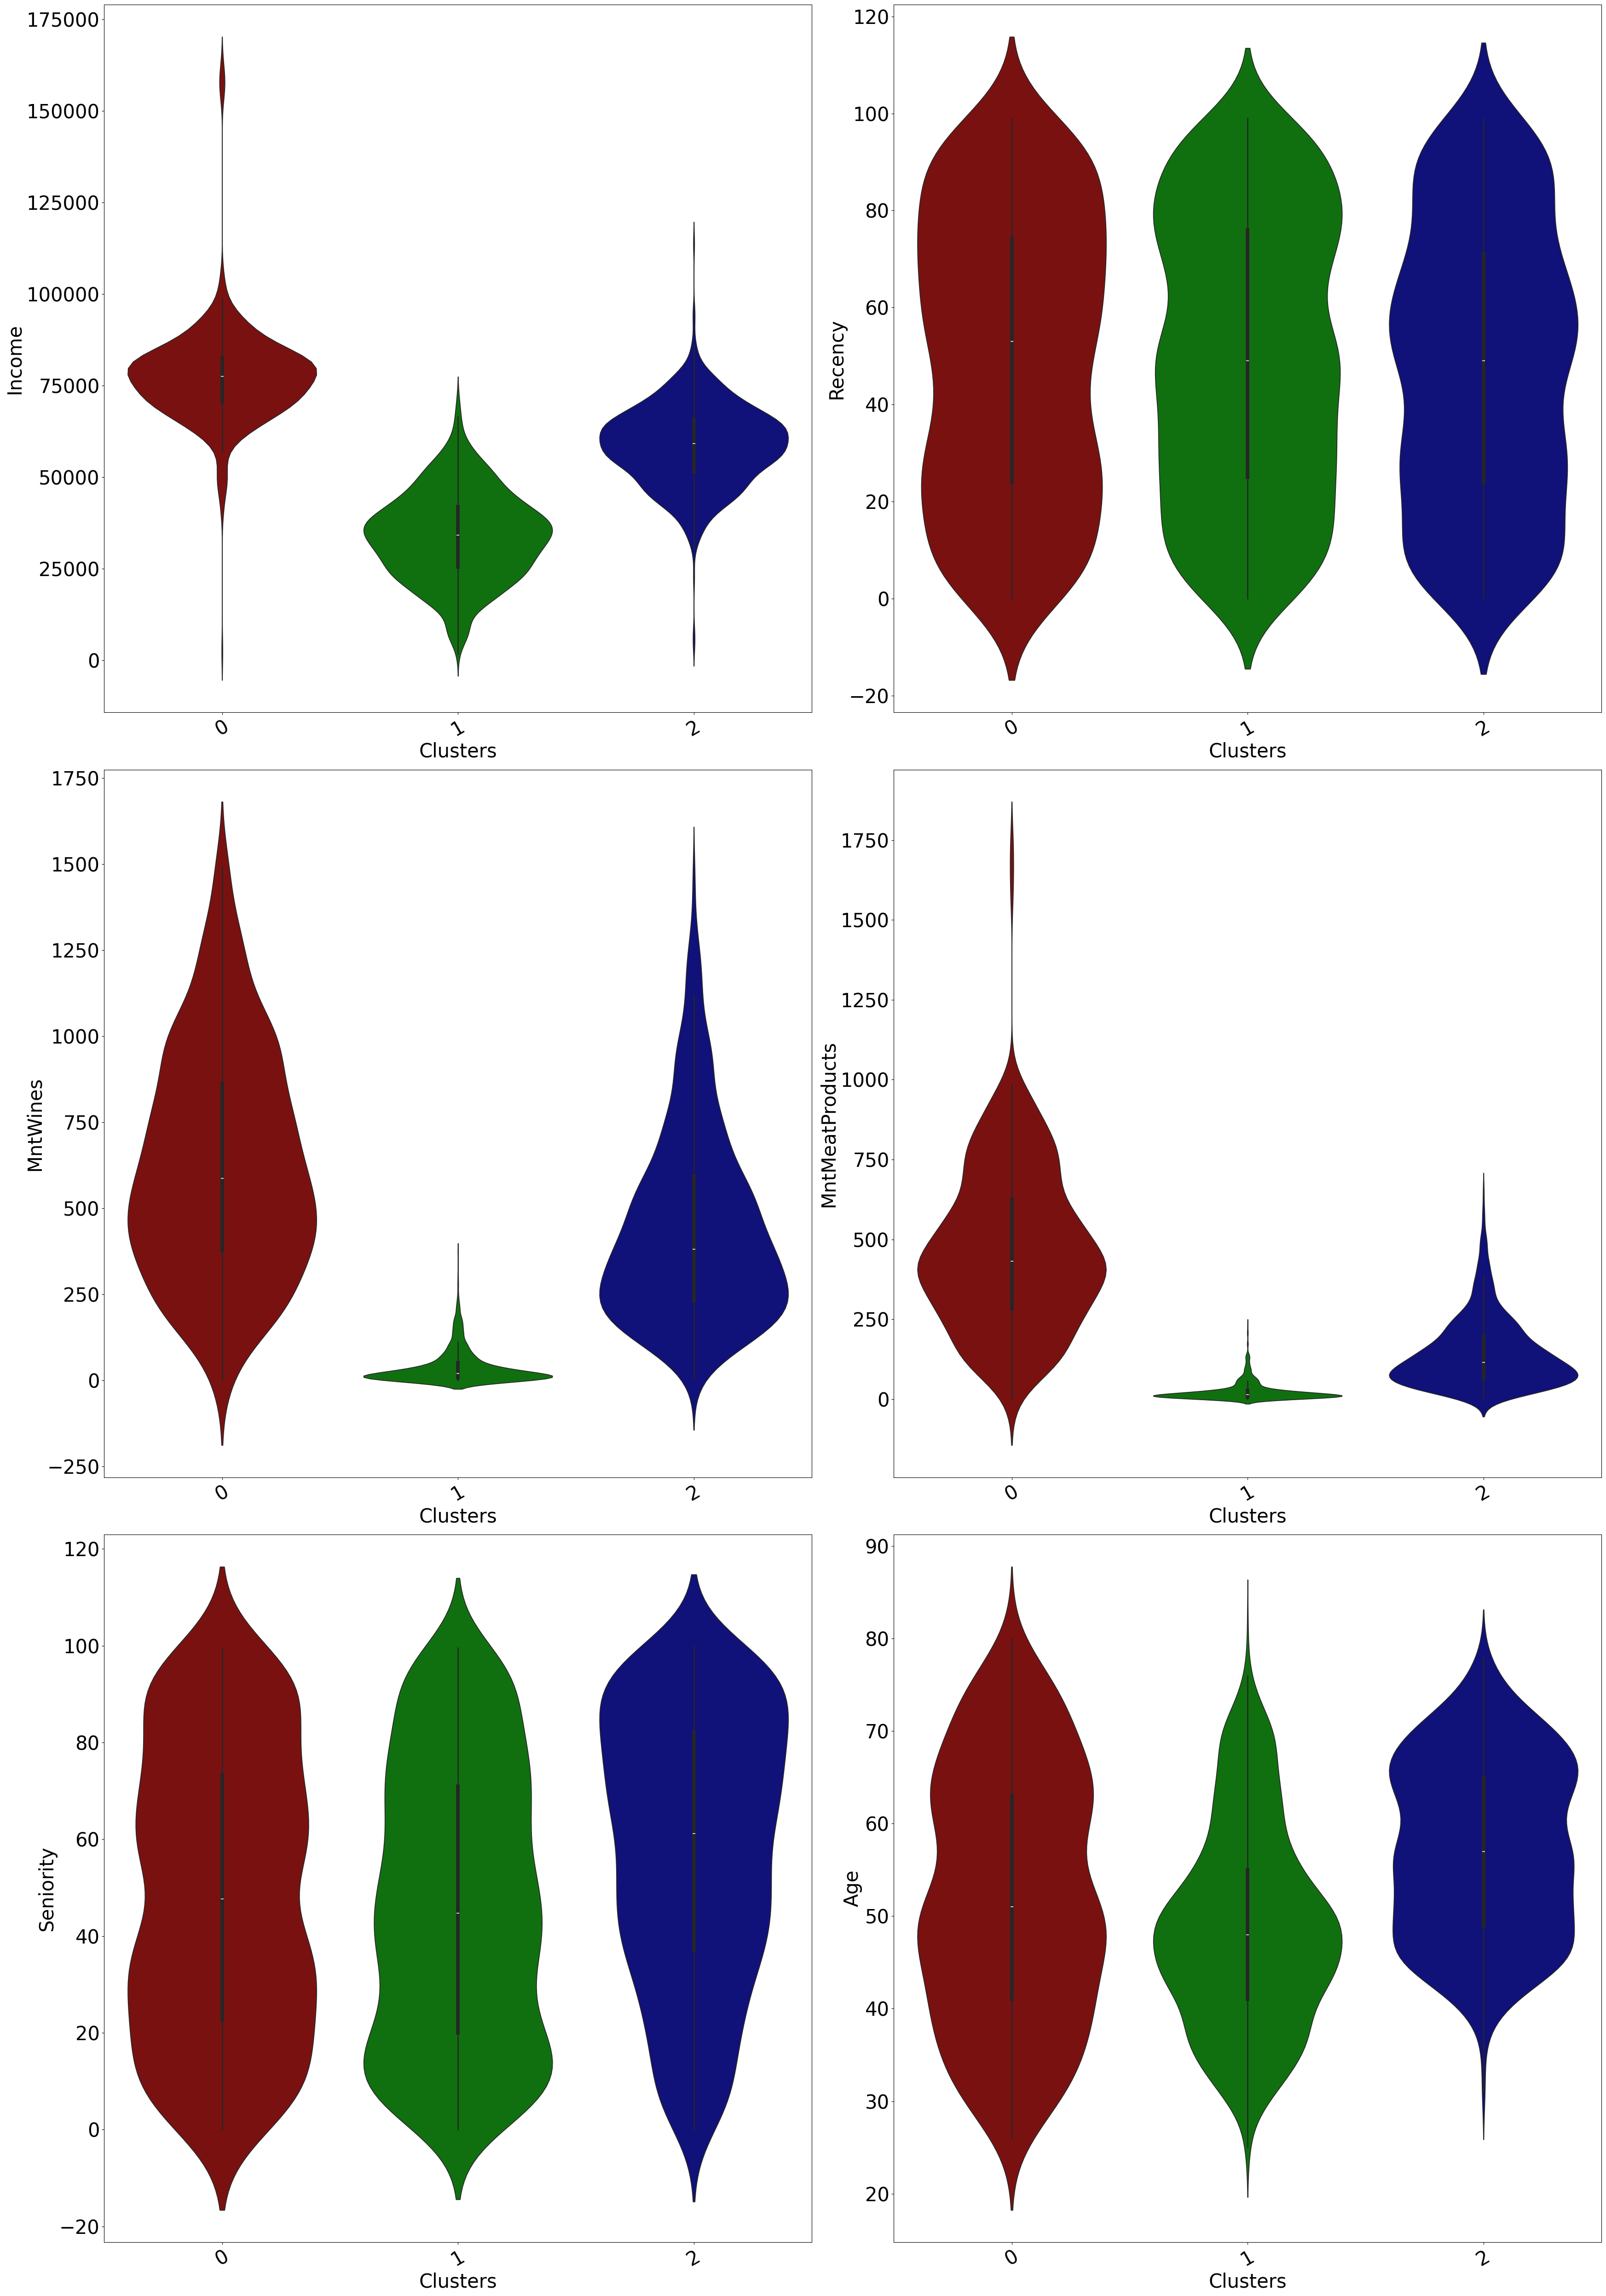

In [40]:
# Violin plot for continuous features
# Number of subplots per row
grh_per_row = 2

# Create subplots
fig, ax = plt.subplots(len(col_cont) // grh_per_row, grh_per_row, figsize=(35, 50))

# Loop through each continuous numerical feature
for count, feature in enumerate(col_cont, 0):
    row = count // grh_per_row
    col = (count) % grh_per_row
    ylim = max(data[feature].max(), abs(data[feature].min()))

    # Plot violin plot with specific colors for each cluster
    sns.violinplot(x='Clusters', y=feature, data=data, ax=ax[row, col], palette={'0': 'darkred', '1': 'g', '2': 'darkblue'})
    ax[row, col].tick_params(axis='x', rotation=30)  # Rotate x-axis labels
    ax[row, col].set_title(f'Violin Plot: {feature}')
    ax[row, col].set_title('')

    # Adjust axis label size and tick label size
    ax[row, col].tick_params(axis='both', labelsize=30)
    ax[row, col].set_xlabel('Clusters', fontsize=30)
    ax[row, col].set_ylabel(feature, fontsize=30)

# Adjust layout
plt.tight_layout()
plt.show()

#### A few quick findings - Histogram, KDE, violin:
- Cluster 0 has the lowest income and cluster 2 has the highest.
- Cluster 0 has lots of low end (near 0) purchases of wine and meat. Cluster 1 is the middle and cluster 2 makes the highest purchases.
- Cluster 1 has more of longtime (80-100 weeks) customers. Cluster 0 has slightely more new (10-20 weeks) customers.
- Cluster 0 has slightly more younger people (mid 40 to 50) and cluster 1 has slightly more older people (60-70).

#### See some statistics to to dive in.

In [41]:
data.loc[:, ['Income','Kidhome','Teenhome','Recency',"Clusters"]].groupby('Clusters').describe(include='all').loc[:,(slice(None),['mean', 'min','25%', '50%', '75%'])].style.background_gradient(cmap='Greys')


In [42]:
data.loc[:, ["MntWines",'MntMeatProducts',"NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","Clusters"]].groupby('Clusters').describe(include='all').loc[:,(slice(None),['mean', '25%', '50%', '75%'])].style.background_gradient(cmap='Greys')

In [43]:
data.loc[:, ["NumWebPurchases", "NumWebVisitsMonth",'Complain', 'Seniority', 'Age','Campaigns_Accepted', "Clusters"]].groupby('Clusters').describe(include='all').loc[:,(slice(None),['mean', '25%', '50%', '75%'])].style.background_gradient(cmap='Greys')

#### A few quick findings - statistics:
- Cluster 1 and 2 mostly (>75%) don't have young kids.
- Income interquartile range for cluster 0,1,2 is around 25-40k, 50-65k, 70-85k. 
- Cluster 1 mostly (>75%) has teen. >50% cluster 0 don't have teen. Cluster 2 mostly (>75%) don't have teen.
- Wine interquartile range for cluster 0,1,2 is around 5-50, 25-600, 350-850. 
- Deal purchase interquartile range for cluster 0,1,2 is around 1-3, 2-5, 1-1. Cluster 1 make the most deal purchases and most cluster 2 (>75%) only have 1 deal purchase.
- Web purchase interquartile range for cluster 0,1,2 is around 1-3, 4-8, 3-6. Cluster 1 make the most web purchases and cluster 0 the least.
- Catalog purchase interquartile range for cluster 0,1,2 is around 0-1, 2-4, 4-8. Cluster 2 make the most catalog purchases and cluster 0 the least.
- Store purchase interquartile range for cluster 0,1,2 is around 3-4, 5-10, 6-10. Cluster 0 and 2 store purchases are very similar and cluster 0 the least.
- Web Visit last month interquartile range for cluster 0,1,2 is around 5-8, 4-7, 1-3. Cluster 0 and 1 web visit are very similar and cluster 2 the least.
- Seniority interquartile range for cluster 0,1,2 is around 20-70, 37-82, 22-73. Cluster 1 has slightly more longtime customer
- Age interquartile range for cluster 0,1,2 is around 40-55, 50-65, 40-63. Cluster 1 are slightly older


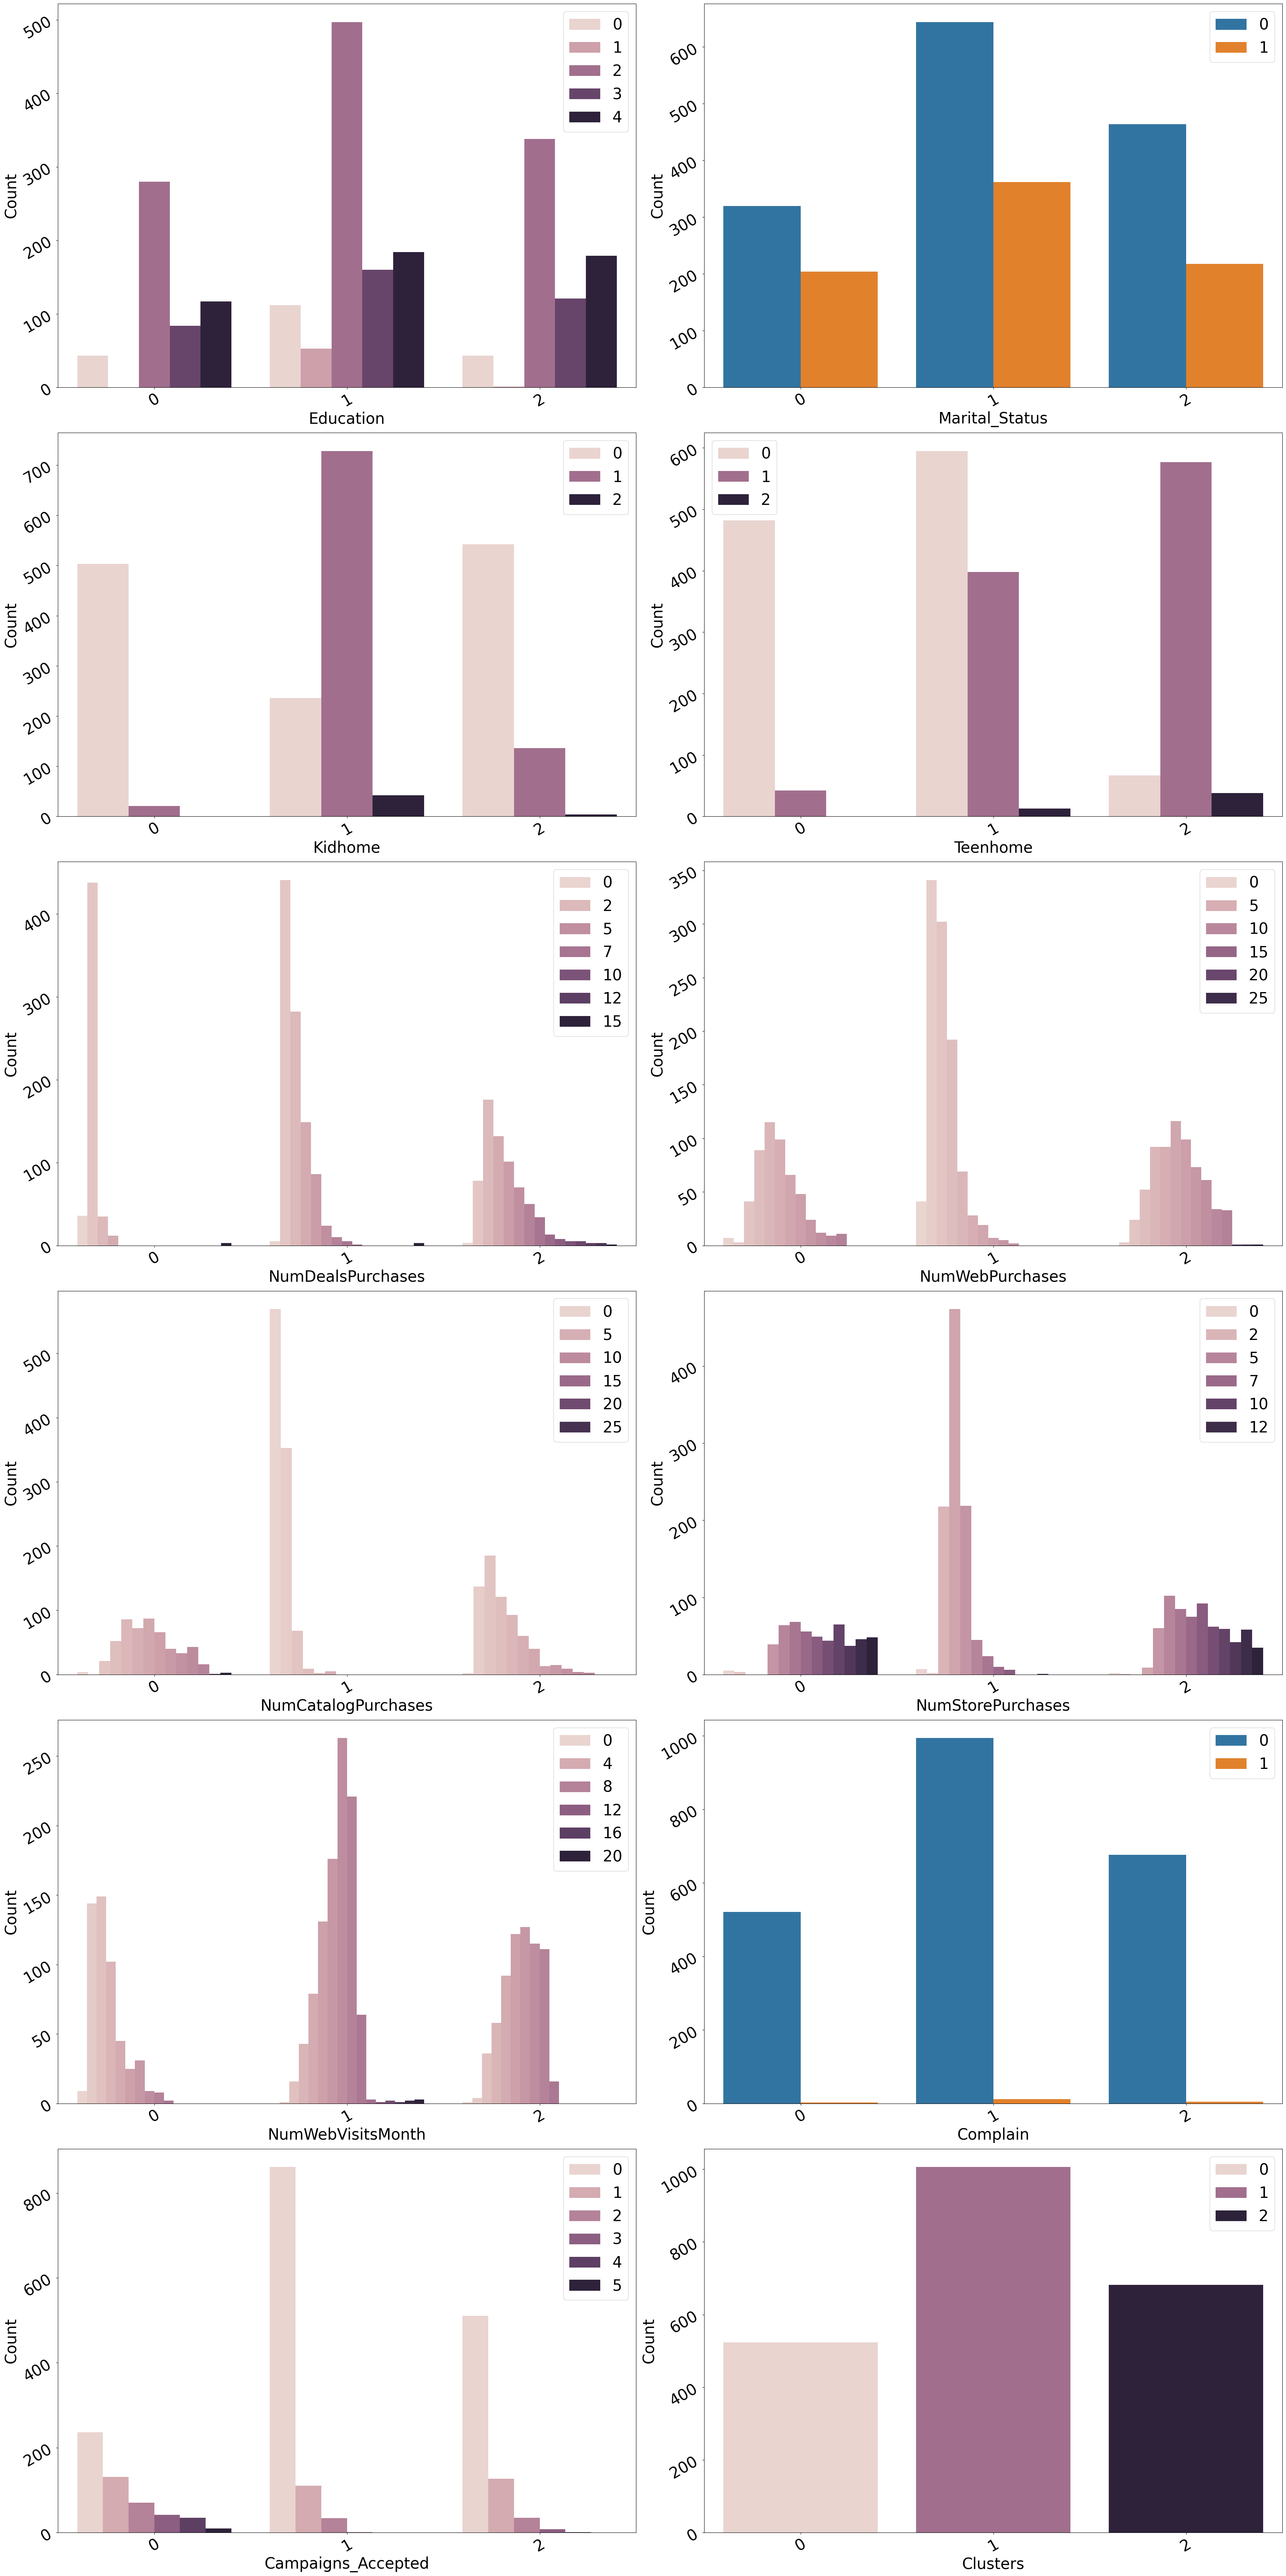

In [44]:
# Countplots for discrete features
grh_per_row = 2
fig, ax = plt.subplots(len(col_dis) // grh_per_row, grh_per_row, figsize=(35, 70))

for count, feature in enumerate(col_dis, 0):
    data_copy = data.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row
    sns.countplot(x='Clusters', data=data, hue=feature, ax=ax[row, col])  # Specify the axis for the countplot
    ax[row, col].set_xlabel(feature, fontsize=30)
    ax[row, col].set_ylabel("Count", fontsize=30) 
    ax[row, col].tick_params(axis='both', rotation=30, labelsize=30)  # Rotate x-axis labels and adjust label size
    ax[row, col].legend(fontsize=30)  # Set legend label size

# Adjust layout
plt.tight_layout()
plt.show()

#### A few quick findings - counterplots:
- We have lots of cluster 0 people (around 50%)
- Lots of 1-time deal purchase come from cluster 0 and 2 (probably for different reasons). 
- Cluster 1 has more 5+ deal purchases.
- Cluster 2 has more 6+ catalog purchases.
- Most Cluster 1 has 0 campain accepted. A bit more than 50% cluster 2 has 0 campain accepted. But, >50% of people in cluster 2 has more than 1+ campaign accepted. Most people accepted 2+ campaigns are in cluster 2.





## 6. Conclusion

- We have **lots of cluster 0 people (around 45%)** (hence we don't want to give them up. There might be some potentials we could find.)
    
- **Cluster 0** has the **lowest income** (mean of 33,992), **Cluster 2** has the **highest**(mean of 77589).
    
- **Cluster 0** has the **lowest meat and wine purchases** (median 50% have 8-51 wine purchases）, **Cluster 2** has the **highest** (median 50% have 377-864 wine purchases).
    
- **Cluster 0 mostly (a little less than 80%) has young kids at home**. **Cluster 1 and 2 mostly (>75%) don't** have young kids.
    
- **Cluster 0** people are **slightly younger**(median 50% 40 to 55 and more mid 40 to 50 than other clusters) and **cluster 1** are **slightly older**(median 50% 50-65 and more 60-70 than other clusters).
  
- **Cluter 0 and 1 web visit are very similar** and **cluster 2 the least**.

- **Cluster 1 mostly(>75%) has teen at home**. **Cluster 2 mostly(>75%) don't have teens**.
    
- **Cluster 1** has the **highest web purchases** in the past two years (median 50% has 4-8) and has the **most 5+ deal purchases**. 
    
- **Cluster 1** tends to have more ** longtime customers (80-100 weeks)** than other groups.
    
- **Most 1-time deal purchases** are in **cluster 0 and 2** group. (maybe for different reasons ;( )  For cluster 2, lots of deal purchases are just 1-time.
    
- Lots of **high (6+) catalog purcahses** happen in **cluster 2**.
 
- **Cluster 2 people involved in campaign the most**. >50% of them has at least one campaign accepted and most 2+ campaign accepted happens in this group.

    
    

### <font>Customer's Cluster Profiling</font>
    
- **Cluster 0**: Lots of (45%) customers come from this group and they have slightly more new customers. They seem to be slightly younger folks with relatively lower income. Most of them have young kids at home. Like cluster 1, they do like to surf on the company's website for deals but may not have strong purchase power. So, they make the least purchases.

- **Cluster 1**: 31% of customers come form this group and they have a bit more long-time customers. They seem to be slightly older people with median income so they make the median purchases. Most of them have teen(s) at home. They like to surf on the web and buy more deal products.
    
- **Cluster 2**: 24% of customers come form this group. They seem to have the highest income and make the most purchases. Most of them don't have kids or teens. 6+ catalog purchases and 2+ campaign accepted mostly happen in this group. They aren't big fan of the store's web visits so their web purchases is slightly lower than the cluster 1 people. They are either busy or prefer traditional sale channels.
    
    

### <font>Possible store's actions?</font>
    
There might be some actions the store could take to meet the diverse needs of each cluster and optimize the store's marketing and customer engagement efforts. Below I listed a few possible actions:

- **Higher-Income Individuals (Cluster 2)**:
  - They don't visit the store's website frequently, the store could focus on exclusive catalog offerings and campaigns delivered through traditional channels for them.
  - They have higher income and make lots of purchases. The store could emphasize a bit on high-quality (or higher-end) products for them.
 
- **Lower and Median Income Individuals (Clusters 0 and 1)**:
  - Most of them has kids or teens and might be tight on money. The store could emphasize affordability and family-friendly options for them.
    
  - They enjoy store website and engage more in deals. The store could promote more online deals and enhance the online shopping experience specifically towards them.

- **Cluster 1 older customers**
  - Cluster 1 have more longtime and older customers, the store could promote loyalty programs, and senior discounts to enhance customer retention and satisfaction for them.

